## The Trend and Distribution Study of CO2 and Temperature in the World
#### Muhammad Taky Tahmid
#### PhD Student 
#### Environmental Economics
#### University of Delaware

In [1]:
# Library
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [23]:
# from zenodo data of NAM
#! wget https://zenodo.org/record/3566026/files/CO2_Tem_Data.zip


In [3]:
#pip install requests beautifulsoup4

import os
import requests
from bs4 import BeautifulSoup

# Set the URL and pattern
url = "https://gml.noaa.gov/aftp/products/carbontracker/co2/CT2022/molefractions/co2_total_monthly/"
pattern = "CT2022.molefrac_glb3x2_"

# Get the content of the webpage
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all links that match the pattern
files = [link.get('href') for link in soup.find_all('a') if link.get('href').startswith(pattern)]

# Download each file
for file_name in files:
    file_url = os.path.join(url, file_name)
    print(f"Downloading {file_name}...")
    file_response = requests.get(file_url)
    
    with open(file_name, 'wb') as f:
        f.write(file_response.content)

print("Download complete!")


Download complete!


In [6]:
#This is to use when we donwload the NAM data
# ! unzip -o CO2_Tem_Data.zip

In [7]:
ds = xr.open_mfdataset('./CT2022*.nc', combine='by_coords')  # Open multiple NetCDF files and combine them by coordinates
ds

<xarray.Dataset>
Dimensions:              (time: 254, level: 34, latitude: 90, longitude: 120,
                          boundary: 35, calendar_components: 6)
Coordinates:
  * boundary             (boundary) int32 1 2 3 4 5 6 7 ... 29 30 31 32 33 34 35
  * calendar_components  (calendar_components) int32 1 2 3 4 5 6
  * latitude             (latitude) float64 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
  * level                (level) int32 1 2 3 4 5 6 7 8 ... 28 29 30 31 32 33 34
  * longitude            (longitude) float64 -178.5 -175.5 ... 175.5 178.5
  * time                 (time) datetime64[ns] 2000-01-16T12:00:00 ... 2021-0...
Data variables:
    air_mass             (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 90, 120), meta=np.ndarray>
    blh                  (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 120), meta=np.ndarray>
    co2                  (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 90, 120), meta=np.ndarray>
    decimal_date         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gph                  (time, boundary, latitude, longitude) float32 dask.array<chunksize=(1, 35, 90, 120), meta=np.ndarray>
    orography            (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 120), meta=np.ndarray>
    pressure             (time, boundary, latitude, longitude) float32 dask.array<chunksize=(1, 35, 90, 120), meta=np.ndarray>
    specific_humidity    (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 90, 120), meta=np.ndarray>
    temperature          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 90, 120), meta=np.ndarray>
    time_components      (time, calendar_components) int32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    u                    (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 90, 120), meta=np.ndarray>
    v                    (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 34, 90, 120), meta=np.ndarray>
Attributes:
    notes:                     This file contains CarbonTracker mole fraction...
    disclaimer:                CarbonTracker is an open product of the NOAA E...
    email:                     carbontracker.team@noaa.gov
    url:                       http://carbontracker.noaa.gov
    institution:               NOAA Earth System Research Laboratory
    conventions:               CF-1.5
    history:                   Tue May 14 10:38:01 2024: ncra -O -o /ct/andy/...
    version:                   CarbonTracker release version CT2022 - mole fr...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1
    nco_input_file_number:     31
    nco_input_file_list:       CT2022.molefrac_glb3x2_2000-01-01.nc CT2022.mo...

## 1  The recent trend of CO2 and temperature in the world

**The graphs show recent trend of CO2 level and compare the trends of CO2 and temperature.** 

The left plot shows the global trend in CO2 concentration from 2000 to 2020. The red dashed line highlights monthly mean CO2 levels, which fluctuate seasonally between approximately 370 ppm and 410 ppm. Despite these fluctuations, the black solid line representing the annual resampled CO2 average shows a clear upward trend, rising from around 370 ppm in 2000 to over 410 ppm by 2020, indicating a steady increase in atmospheric CO2 levels.

The right plot compares global temperature trends with CO2 concentration over the same period. The red line with stars shows a consistent rise in temperature, increasing from about 247 K in 2000 to 250 K in 2020. The black line, representing annual CO2 levels, is overlaid using a secondary axis and follows a similar upward trajectory. The parallel rise in both CO2 concentration and temperature suggests a link between increasing CO2 levels and global warming.

In [25]:
# Resample the dataset to yearly averages, with the label aligned to the left edge of the resampled time period
ds1 = ds.resample(time='1Y', label='left').mean(dim='time')

# Calculate the global mean CO2 concentration over latitude, longitude, and level for the original dataset
C_time = ds.co2.mean(dim=['latitude', 'longitude', 'level'])

# Calculate the global mean CO2 concentration for the resampled yearly dataset
C_time_year = ds1.co2.mean(dim=['latitude', 'longitude', 'level'])

# Calculate the global mean temperature for the resampled yearly dataset
T_time_year = ds1.temperature.mean(dim=['latitude', 'longitude', 'level'])


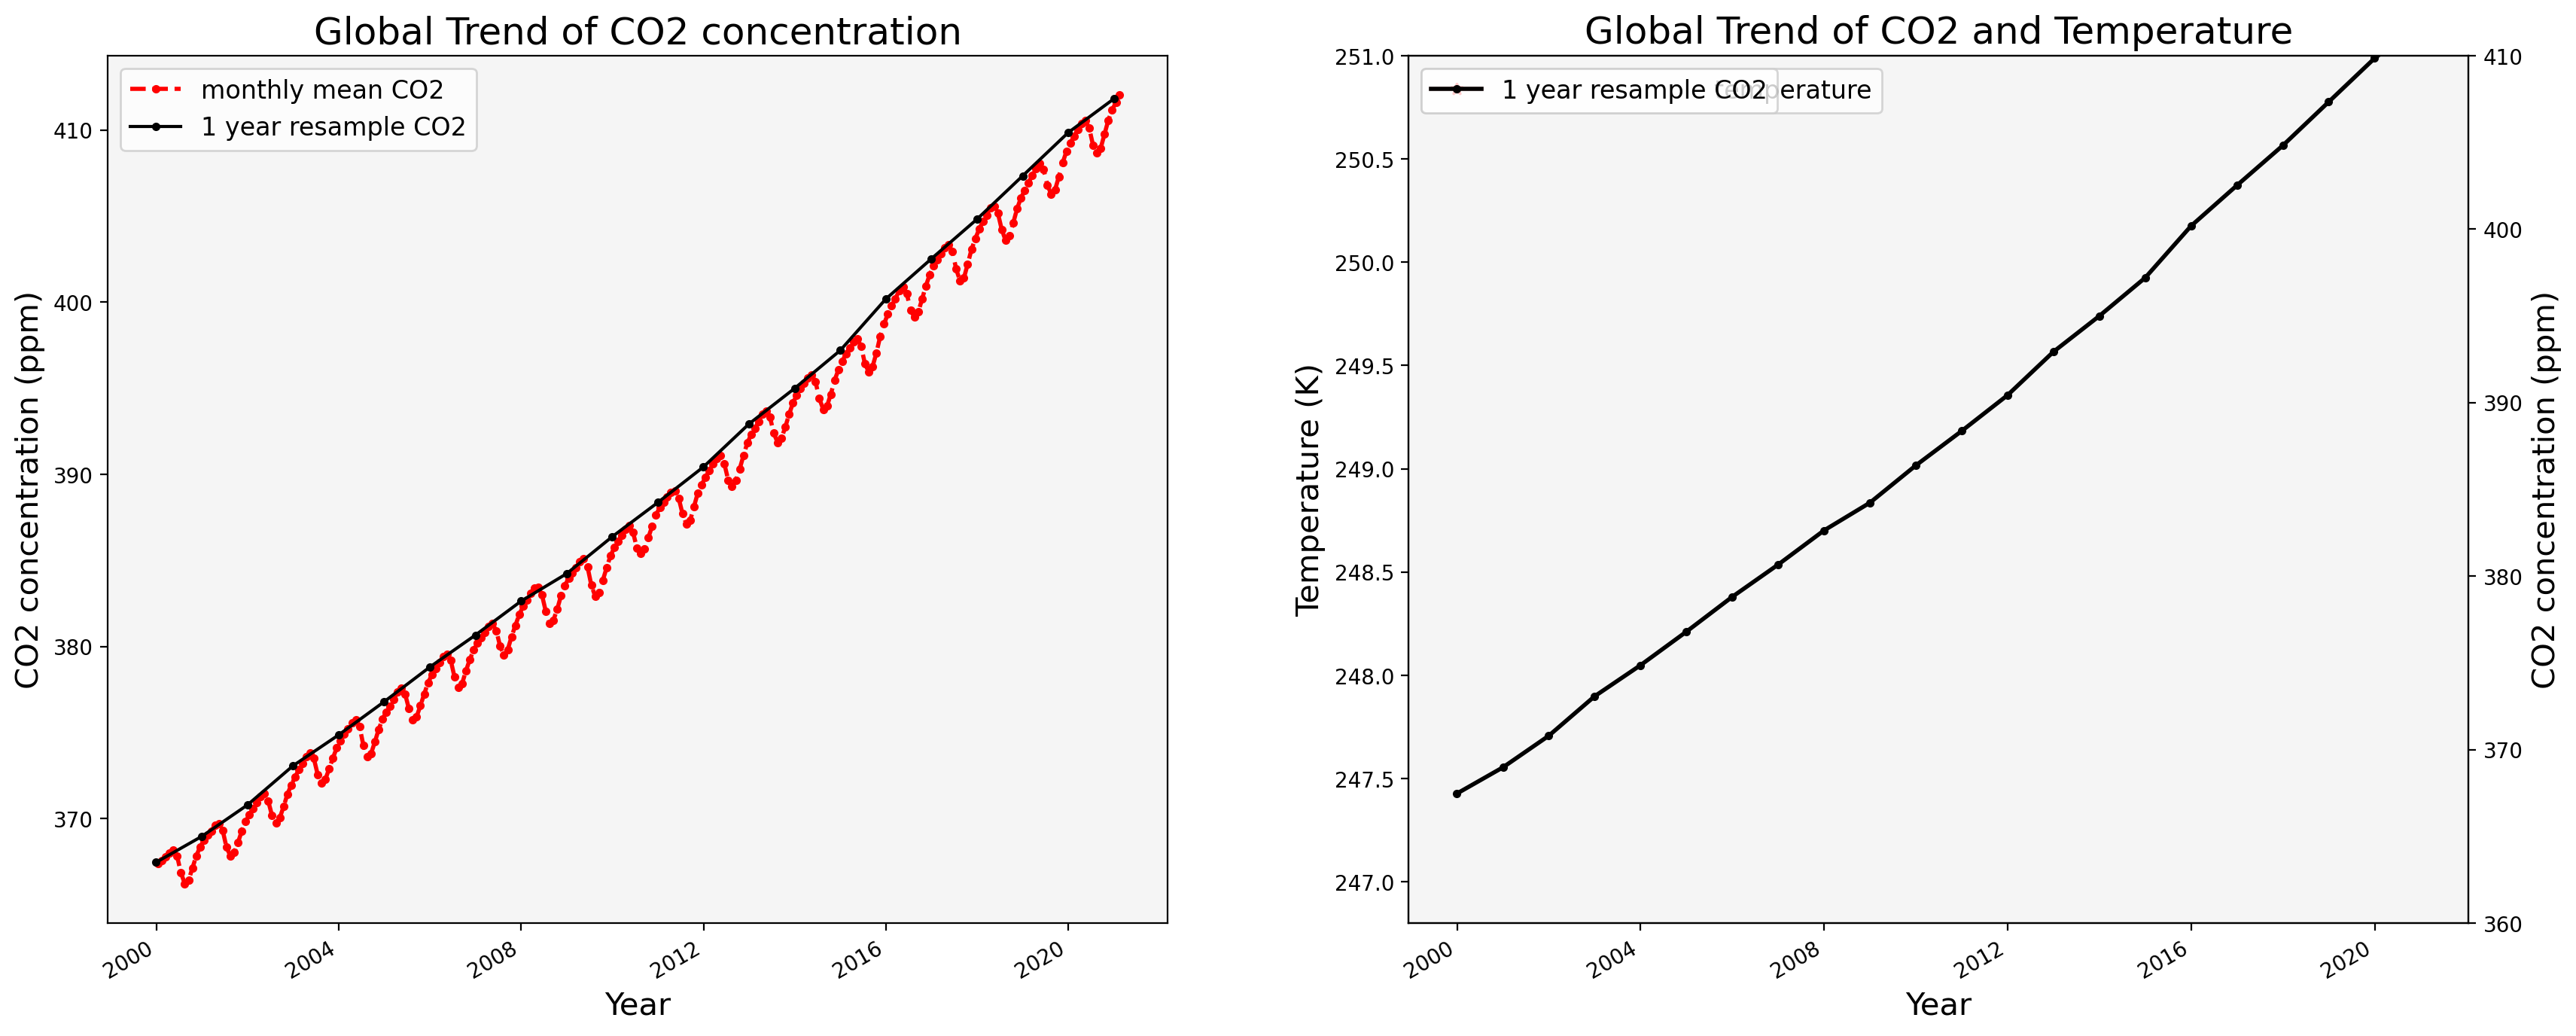

In [24]:
fig = plt.figure()

# Create the first plot for CO2 concentration
ax1 = fig.add_axes([1, 0, 1.1, 1.2], facecolor='whitesmoke')
C_time.plot(ax=ax1, color='r', marker='.', linestyle='dashed', linewidth=2, label='monthly mean CO2')
C_time_year.plot(ax=ax1, color='k', marker='.', linewidth=1.5, label='1 year resample CO2')
ax1.set_title('Global Trend of CO2 concentration', fontsize=18)
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('CO2 concentration (ppm)', fontsize=15)
ax1.legend(prop={'size': 12})

# Create the second plot for temperature
ax2 = fig.add_axes([2.35, 0, 1.1, 1.2], facecolor='whitesmoke')
T_time_year.plot(ax=ax2, marker='*', color='r', linewidth=2, label='1 year resample temperature')
ax2.set_ylabel('Temperature (K)', fontsize=15)
ax2.set_title('Global Trend of CO2 and Temperature', fontsize=18)
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylim(246.8, 251.0)
ax2.legend(loc='upper left', prop={'size': 12})

# Overlay the CO2 concentration on the second plot with a secondary y-axis
ax3 = ax2.twinx()
C_time_year.plot(ax=ax3, marker='.', linewidth=2, color='k', label='1 year resample CO2')
ax3.set_ylabel('CO2 concentration (ppm)', fontsize=15)
ax3.set_ylim(360.0, 410.0)
ax3.legend(prop={'size': 12})

# Save the figure as a PNG file
plt.savefig('./figures/global_co2_temperature_trends.png', dpi=300, bbox_inches='tight')


## 2. The anomalies of CO2, temperature and other relavant parameters in the World

**The graphs show the anomalies of CO2, temperature, geopotential height, pressures, specific humidity and boundary layer thickness.**

#### CO2 Anomaly in the World
The top left plot shows the CO2 anomaly from 2000 to 2020. The anomaly trends upward steadily, starting from approximately -20 ppm in 2000 and reaching just over 20 ppm by 2020. This continuous increase indicates that CO2 levels have been rising consistently relative to the long-term monthly average, reflecting ongoing increases in atmospheric CO2 concentrations globally.

#### Boundary Layer Thickness Anomaly in the World
The top right plot illustrates the boundary layer thickness anomaly over the same period. Unlike CO2, the anomalies in boundary layer thickness fluctuate around zero, with no clear long-term trend. The values generally range between -40 m and +40 m, indicating that variations in boundary layer thickness are more localized and do not show a significant global shift over the past two decades.

#### Temperature and Specific Humidity Anomalies in the World
The bottom left plot compares temperature and specific humidity anomalies. Temperature anomalies fluctuate around zero, with values ranging from approximately -1.5 K to +2.0 K. Specific humidity anomalies show more variation, particularly after 2010, with spikes reaching up to 6e-5 kg/kg. These fluctuations suggest variability in both temperature and humidity over time, with a noticeable increase in specific humidity anomalies in the later years.

#### Geopotential Height and Pressure Anomalies in the World
The bottom right plot depicts the anomalies in geopotential height and pressure. Both variables exhibit fluctuations around zero, with geopotential height anomalies ranging from -75 m to +75 m and pressure anomalies ranging from -40 Pa to +60 Pa. These fluctuations suggest that, while there are significant short-term variations, there has not been a persistent long-term change in these variables over the two decades observed.

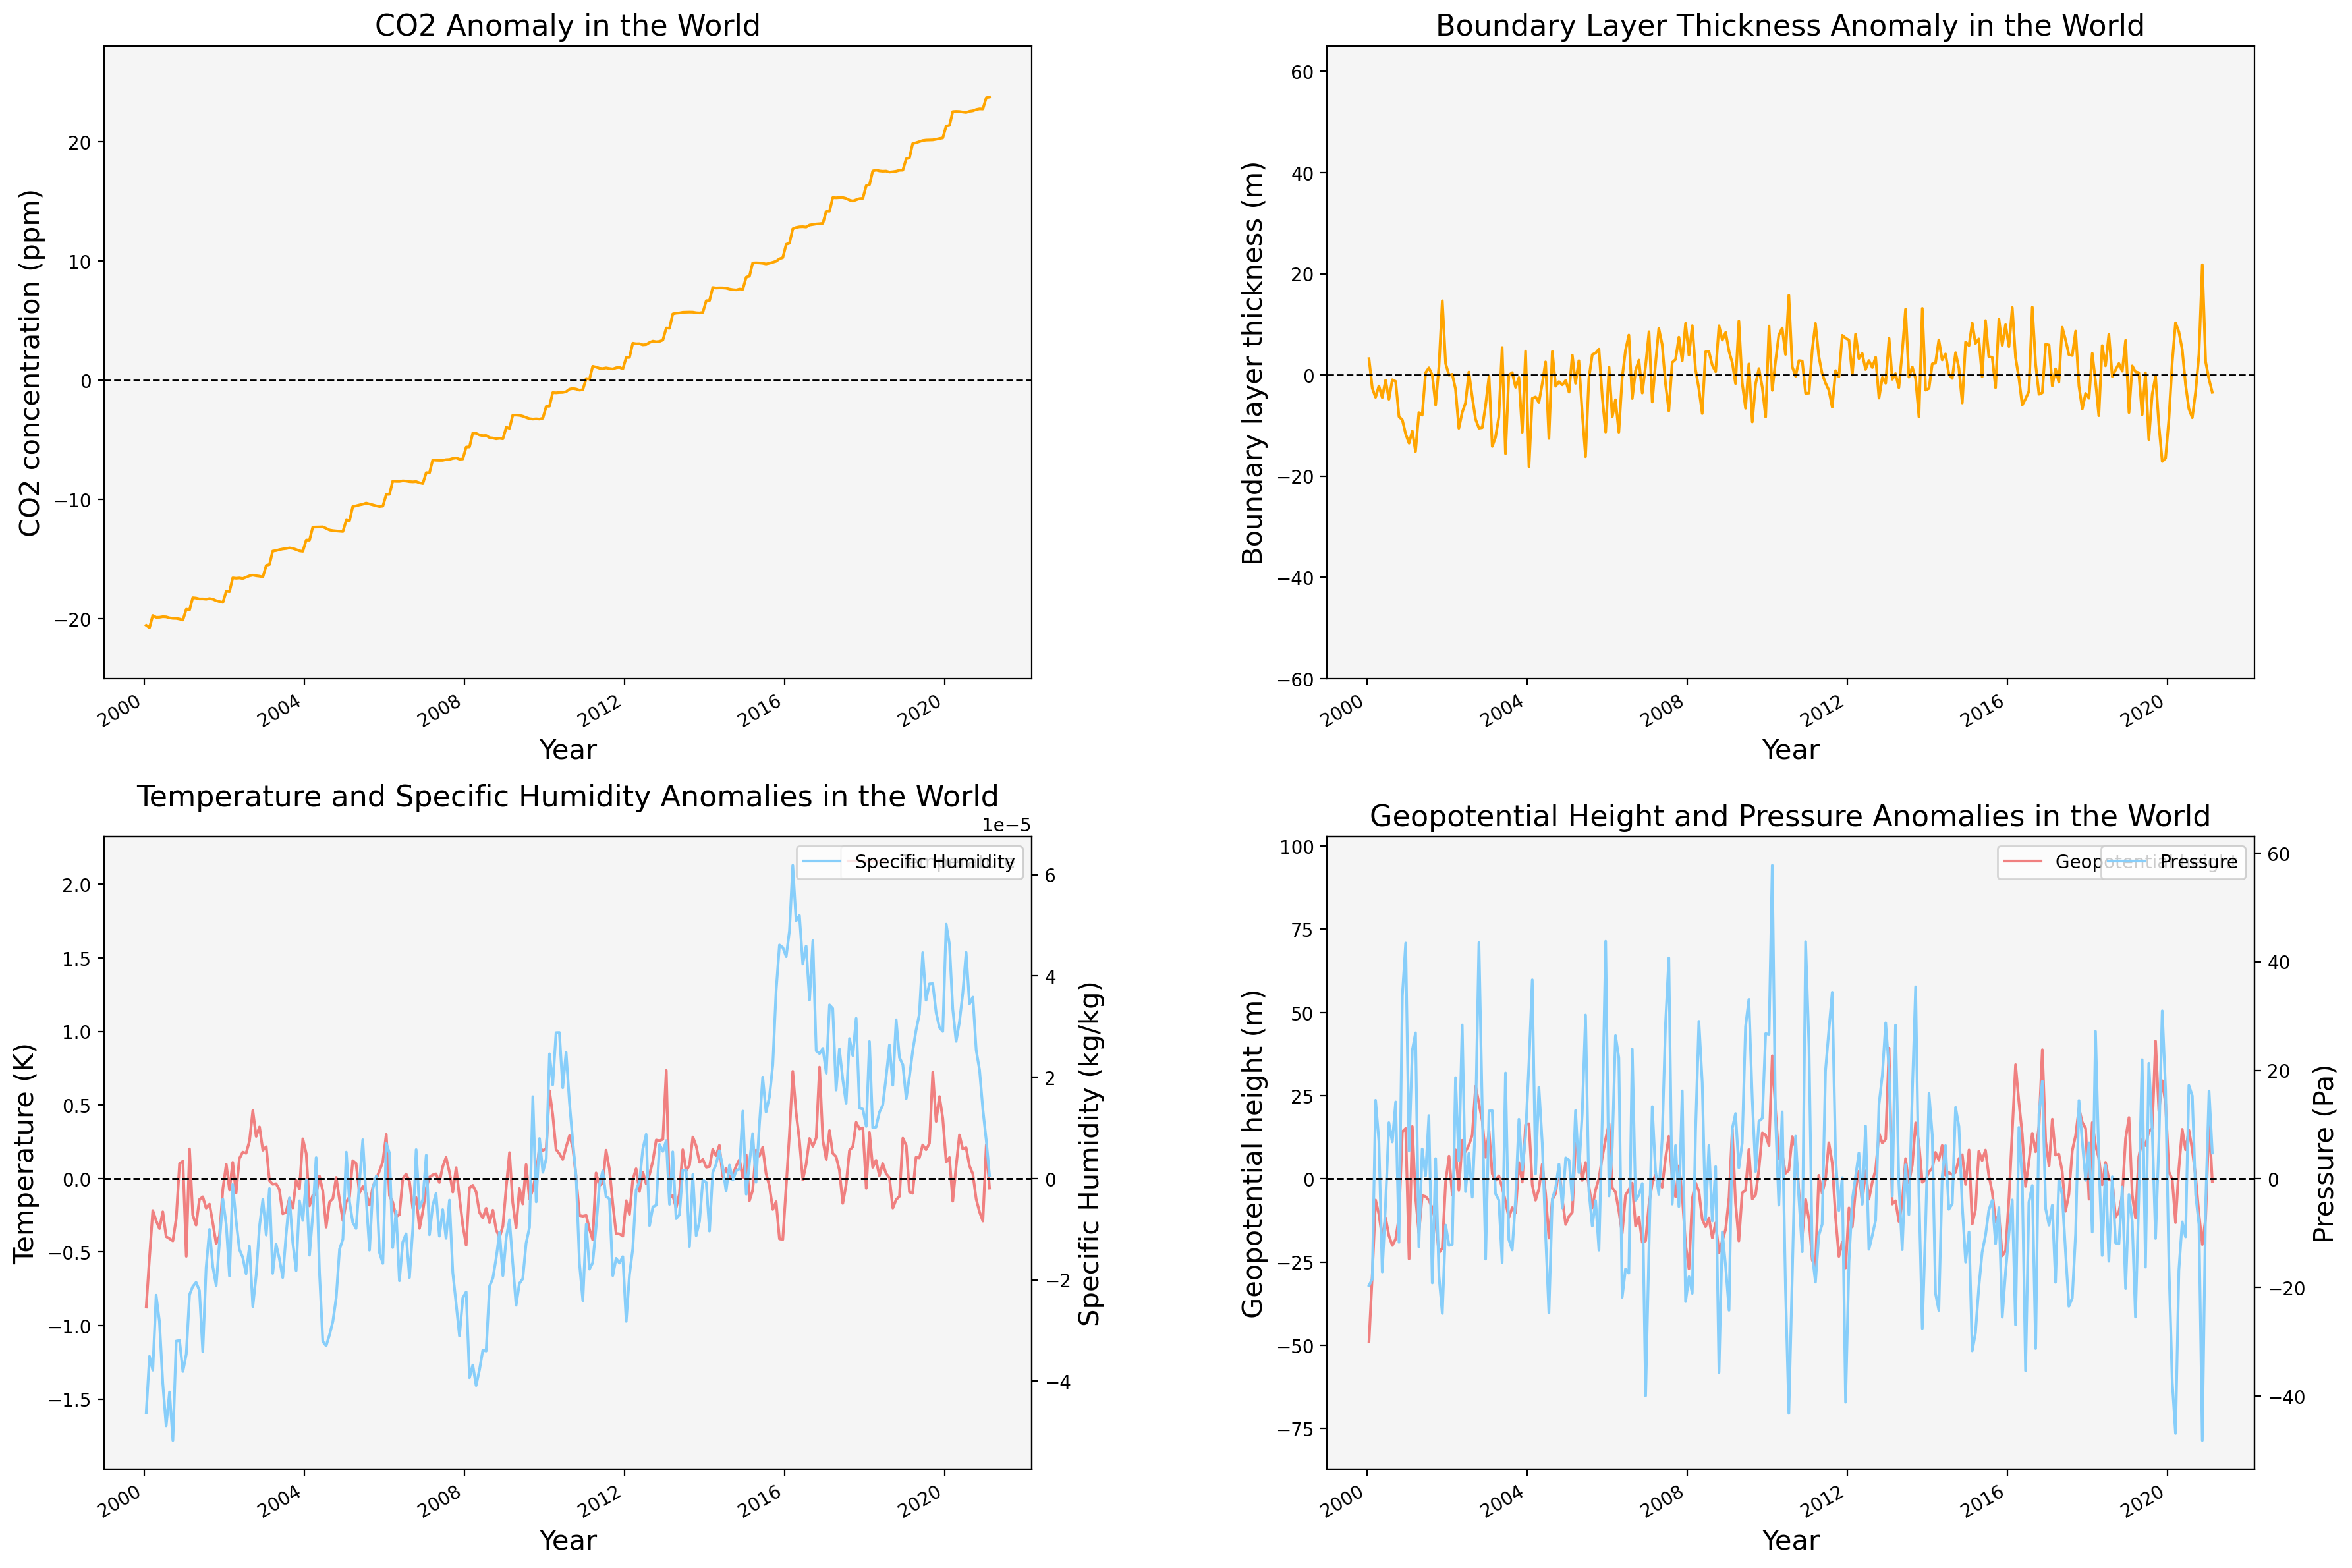

In [26]:
import matplotlib.pyplot as plt

# Group data by month and compute anomalies by subtracting the monthly mean
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')

# Calculate anomalies for different variables by averaging over latitude, longitude, and level
C_anom = ds_anom.co2.mean(dim=['latitude', 'longitude', 'level'])
T_anom = ds_anom.temperature.mean(dim=['latitude', 'longitude', 'level'])
S_anom = ds_anom.specific_humidity.mean(dim=['latitude', 'longitude', 'level'])
G_anom = ds_anom.gph.mean(dim=['latitude', 'longitude', 'boundary'])
P_anom = ds_anom.pressure.mean(dim=['latitude', 'longitude', 'boundary'])
B_anom = ds_anom.blh.mean(dim=['latitude', 'longitude'])

fig = plt.figure()

# Plot CO2 anomalies
ax1 = fig.add_axes([1, 1.25, 1.1, 1], facecolor='whitesmoke')
C_anom.plot(ax=ax1, linewidth=1.5, color='orange')
ax1.set_title('CO2 Anomaly in the World', fontsize=16)
ax1.set_ylabel('CO2 concentration (ppm)', fontsize=15)
ax1.set_xlabel('Year', fontsize=15)
ax1.axhline(y=0, linestyle='dashed', color='k', linewidth=1)  # Add a horizontal line at y=0 for reference
ax1.set_ylim(-25, 28)

# Plot Temperature anomalies
ax2 = fig.add_axes([1, 0, 1.1, 1], facecolor='whitesmoke')
T_anom.plot(ax=ax2, linewidth=1.5, label='Temperature', color='lightcoral')
ax2.set_title('Temperature and Specific Humidity Anomalies in the World', fontsize=16)
ax2.set_ylabel('Temperature (K)', fontsize=15)
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylim(-2.0, 2.3)
ax2.axhline(y=0, linestyle='dashed', color='k', linewidth=1)  # Add a horizontal line at y=0 for reference
ax2.legend()

# Plot Specific Humidity anomalies on a secondary y-axis
ax3 = ax2.twinx()
S_anom.plot(ax=ax3, color='lightskyblue', linewidth=1.5, label='Specific Humidity')
ax3.set_ylabel('Specific Humidity (kg/kg)', fontsize=15)
ax3.set_xlabel('Year', fontsize=15)
ax3.axhline(y=0, linestyle='dashed', color='k', linewidth=1)  # Add a horizontal line at y=0 for reference
ax3.legend()

# Plot Geopotential Height anomalies
ax4 = fig.add_axes([2.45, 0, 1.1, 1], facecolor='whitesmoke')
G_anom.plot(ax=ax4, linewidth=1.5, label='Geopotential height', color='lightcoral')
ax4.set_title('Geopotential Height and Pressure Anomalies in the World', fontsize=16)
ax4.set_ylabel('Geopotential height (m)', fontsize=15)
ax4.set_xlabel('Year', fontsize=15)
ax4.set_ylim(-80, 110)
ax4.axhline(y=0, linestyle='dashed', color='k', linewidth=1)  # Add a horizontal line at y=0 for reference
ax4.legend()

# Plot Pressure anomalies on a secondary y-axis
ax5 = ax4.twinx()
P_anom.plot(ax=ax5, color='lightskyblue', linewidth=1.5, label='Pressure')
ax5.set_ylabel('Pressure (Pa)', fontsize=15)
ax5.set_xlabel('Year', fontsize=15)
ax5.axhline(y=0, linestyle='dashed', color='k', linewidth=1)  # Add a horizontal line at y=0 for reference
ax5.legend()

# Plot Boundary Layer Thickness anomalies
ax6 = fig.add_axes([2.45, 1.25, 1.1, 1], facecolor='whitesmoke')
B_anom.plot(ax=ax6, linewidth=1.5, color='orange')
ax6.set_title('Boundary Layer Thickness Anomaly in the World', fontsize=16)
ax6.set_ylabel('Boundary layer thickness (m)', fontsize=15)
ax6.set_xlabel('Year', fontsize=15)
ax6.set_ylim(-60, 65)
ax6.axhline(y=0, linestyle='dashed', color='k', linewidth=1)  # Add a horizontal line at y=0 for reference

# Function to align the '0' points of different y-axes
def align_yaxis(ax1, v1, ax2, v2):
    """Adjust the y axis of ax2 so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

# Align the '0' of different y-axes for temperature/humidity and geopotential/pressure plots
align_yaxis(ax3, 0, ax2, 0)
align_yaxis(ax5, 0, ax4, 0)

# Save the figure as a PNG file
plt.savefig('./figures/global_anomalies_trends.png', dpi=300, bbox_inches='tight')


## 3. The CO2 abundance and temperature in differnt heights

**The graphs show the variations of CO2, temperature vertically, and make comparision between different time periods.**

#### CO2 Concentration Across Different Levels
The left plot shows CO2 concentration at various atmospheric levels for three different time periods: 2001-2005, 2006-2010, and 2011-2015. The CO2 concentration increases steadily over time across all levels. For instance, in the lower levels (near 0 on the x-axis), CO2 concentrations rise from approximately 375 ppm in 2001-2005 to around 395 ppm in 2011-2015. This indicates a consistent increase in CO2 levels over the decade across all atmospheric layers, with higher concentrations observed in the more recent years.

#### Temperature Across Different Levels
The right plot illustrates temperature variations at different atmospheric levels for the same three periods. The temperature decreases with increasing level until about level 25, where it begins to rise again, forming a U-shaped curve. The temperature is highest near the surface (around 280 K) and decreases to near 210 K at higher levels. The curves for the three periods overlap significantly, indicating that the vertical temperature profile has remained relatively stable over the time intervals considered, with minor differences observed at higher levels.

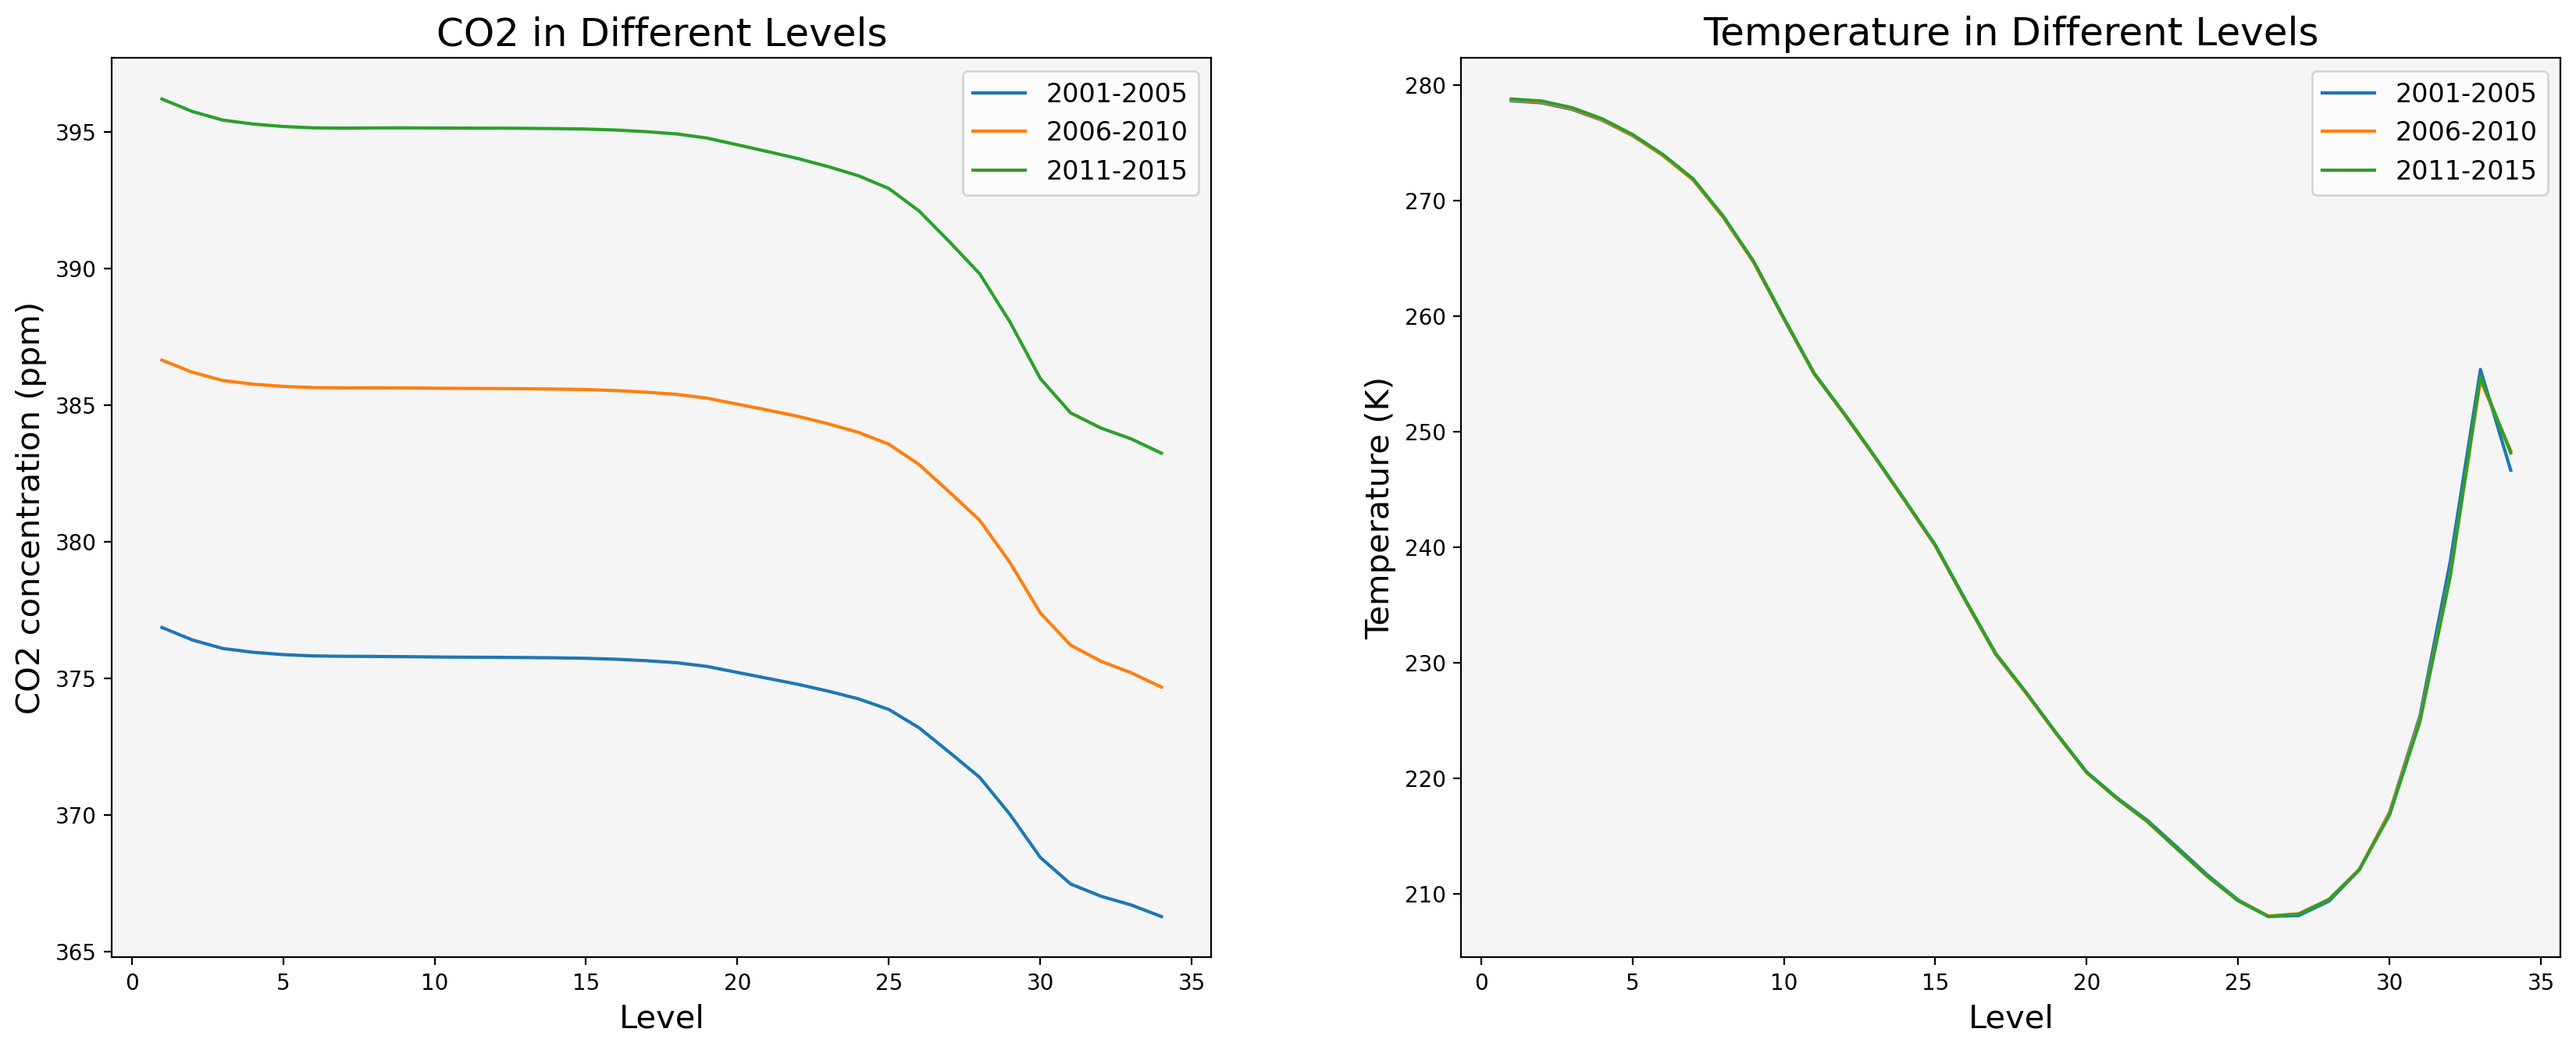

In [28]:
# Select CO2 data for different time periods
C_level_1 = ds.co2.sel(time=slice('2001-12-31', '2005-12-31'))
C_level_2 = ds.co2.sel(time=slice('2006-12-31', '2010-12-31'))
C_level_3 = ds.co2.sel(time=slice('2010-12-31', '2015-12-31'))

# Calculate the mean CO2 concentration across latitude, longitude, and time for each period
level1 = C_level_1.mean(dim=['latitude', 'longitude', 'time'])
level2 = C_level_2.mean(dim=['latitude', 'longitude', 'time'])
level3 = C_level_3.mean(dim=['latitude', 'longitude', 'time'])

fig = plt.figure()

# Plot CO2 concentration for different time periods across vertical levels
ax1 = fig.add_axes([1, 0, 1.1, 1.2], facecolor='whitesmoke')
level1.plot(ax=ax1, label='2001-2005')
level2.plot(ax=ax1, label='2006-2010')
level3.plot(ax=ax1, label='2011-2015')
ax1.set_title('CO2 in Different Levels', fontsize=18)
ax1.set_ylabel('CO2 concentration (ppm)', fontsize=15)
ax1.set_xlabel('Level', fontsize=15)
ax1.legend(prop={'size': 12})

# Select Temperature data for different time periods
T_level_1 = ds.temperature.sel(time=slice('2001-12-31', '2005-12-31'))
T_level_2 = ds.temperature.sel(time=slice('2006-12-31', '2010-12-31'))
T_level_3 = ds.temperature.sel(time=slice('2010-12-31', '2015-12-31'))

# Calculate the mean Temperature across latitude, longitude, and time for each period
level_1 = T_level_1.mean(dim=['latitude', 'longitude', 'time'])
level_2 = T_level_2.mean(dim=['latitude', 'longitude', 'time'])
level_3 = T_level_3.mean(dim=['latitude', 'longitude', 'time'])

# Plot Temperature for different time periods across vertical levels
ax2 = fig.add_axes([2.35, 0, 1.1, 1.2], facecolor='whitesmoke')
level_1.plot(ax=ax2, label='2001-2005')
level_2.plot(ax=ax2, label='2006-2010')
level_3.plot(ax=ax2, label='2011-2015')
ax2.set_title('Temperature in Different Levels', fontsize=18)
ax2.set_ylabel('Temperature (K)', fontsize=15)
ax2.set_xlabel('Level', fontsize=15)
ax2.legend(prop={'size': 12})

# Save the figure as a PNG file
plt.savefig('./figures/co2_temperature_levels.png', dpi=300, bbox_inches='tight')


## 4 The distribution of CO2 and temperature in the World

**The graph shows the mean CO2 from 2000 to 2016 in the World**

#### Key Observations:

**The CO2 concentration varies across different regions**, with higher concentrations generally observed in the Northern Hemisphere compared to the Southern Hemisphere.
The overall CO2 concentration on the map ranges from approximately 385.6 ppm (lighter blue) to 390.4 ppm (darker blue).
Continental Comparisons:

**North America and Europe:** These regions show relatively higher CO2 concentrations, particularly in the eastern United States and central Europe, where concentrations approach the higher end of the scale (around 390.4 ppm).
Asia: High CO2 concentrations are also observed in parts of Asia, particularly in China and India, reflecting the significant industrial activity and population density in these regions.
Africa and South America: These continents generally show lower CO2 concentrations compared to North America, Europe, and Asia. However, there are areas with moderate CO2 levels, particularly in northern Africa and the eastern parts of South America.
Australia: CO2 levels in Australia are relatively low, similar to those seen in much of the Southern Hemisphere.

**Minimum and Maximum Regions:**

Maximum CO2 Concentrations: The highest CO2 levels, approaching 390.4 ppm, are observed in parts of North America, Europe, and Asia, reflecting areas of high industrialization and fossil fuel use.
Minimum CO2 Concentrations: The lowest CO2 concentrations, around 385.6 ppm, are observed in the Southern Hemisphere, particularly over the oceans and less populated regions such as Antarctica, where human activity is minimal.


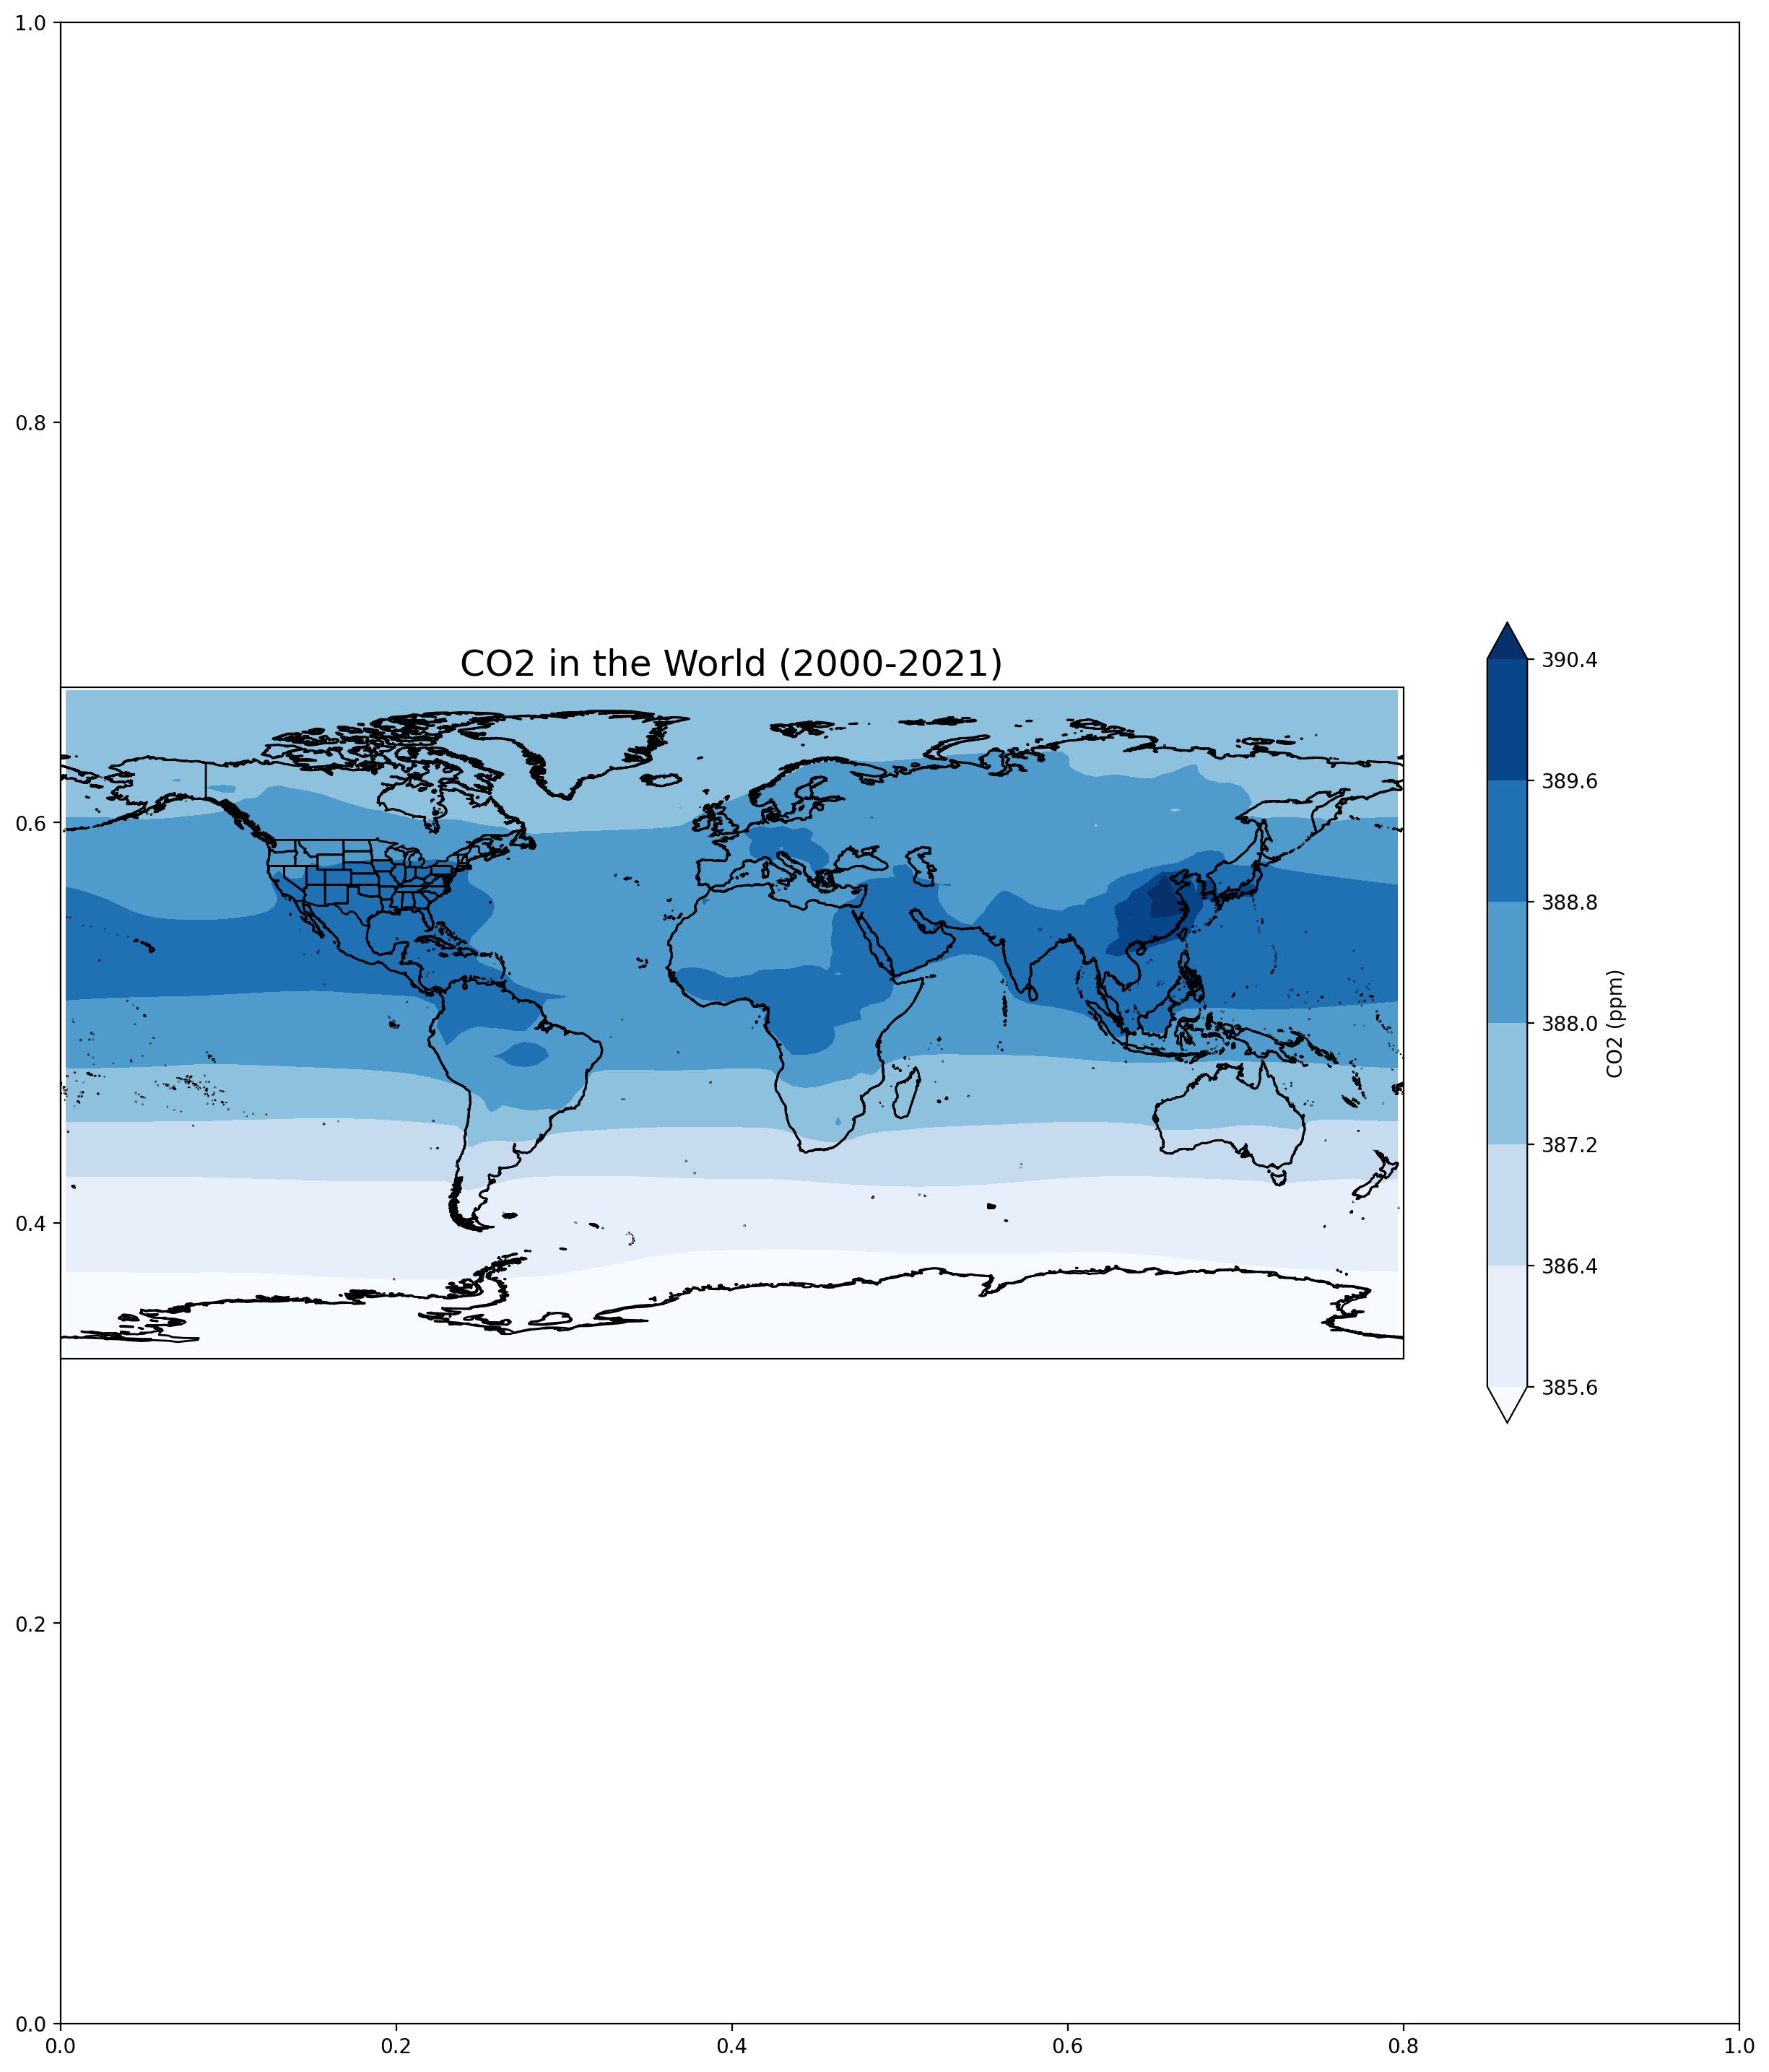

In [33]:
# Set the global extent for the map
extent = [-180, 180, -90, 90]

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(15, 18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)  # Set the extent of the map to cover the entire globe
ax.coastlines()  # Add coastlines to the map
ax.coastlines(resolution='10m')  # Add higher resolution coastlines
ax.add_feature(cfeature.STATES)  # Add state boundaries

# Calculate the mean CO2 concentration across levels and time
CO2 = ds.co2.mean(dim=['level', 'time'])

# Create a filled contour plot of the CO2 concentration
p1 = ax.contourf(CO2.longitude, CO2.latitude, CO2, cmap='Blues', extend='both')

# Add a title to the plot
ax.set_title('CO2 in the World (2000-2021)', fontsize=18)

# Add a colorbar to the plot
fig.colorbar(p1, shrink=0.4, label='CO2 (ppm)')

# Save the figure as a PNG file
plt.savefig('./figures/global_co2_map.png', dpi=300, bbox_inches='tight')


## Distribution of temperature and other related parameters in the World

### Global Air Mass (2000-2021)
The first plot illustrates the global distribution of air mass averaged from 2000 to 2016. The air mass is depicted in a gradient from lighter to darker green, ranging from approximately \(3 \times 10^{12}\) kg to \(2.1 \times 10^{13}\) kg. The highest air masses are observed in the mid-latitudes, particularly around 30-60°N, which corresponds to the regions of the world where the troposphere is thicker due to the atmospheric circulation patterns. Lower air mass values are found near the equator and the poles, where the atmosphere is thinner.

### Global Temperature (2000-2021)
The second plot shows the global average temperature over the same period, with temperatures ranging from about 224 K to 248 K. The map shows that the warmest regions are concentrated near the equator, with temperatures exceeding 240 K. The polar regions, particularly Antarctica and the Arctic, display the coldest temperatures, dropping below 228 K. This temperature gradient highlights the expected latitudinal distribution of heat, with warmer temperatures near the equator and cooler temperatures towards the poles.

### Global Orography (2000-2021)
The third plot represents the global orography, or the elevation of the Earth's surface, averaged over the same period. The color gradient ranges from around 8000 m²/s² to 48000 m²/s², reflecting various topographical features. The highest elevations are indicated by darker orange shades, notably in regions such as the Himalayas in Asia, the Rocky Mountains in North America, and the Andes in South America. Lower elevation areas, depicted in lighter colors, are found across extensive plains and oceanic regions, with significant contrasts evident between continental landmasses and ocean basins.

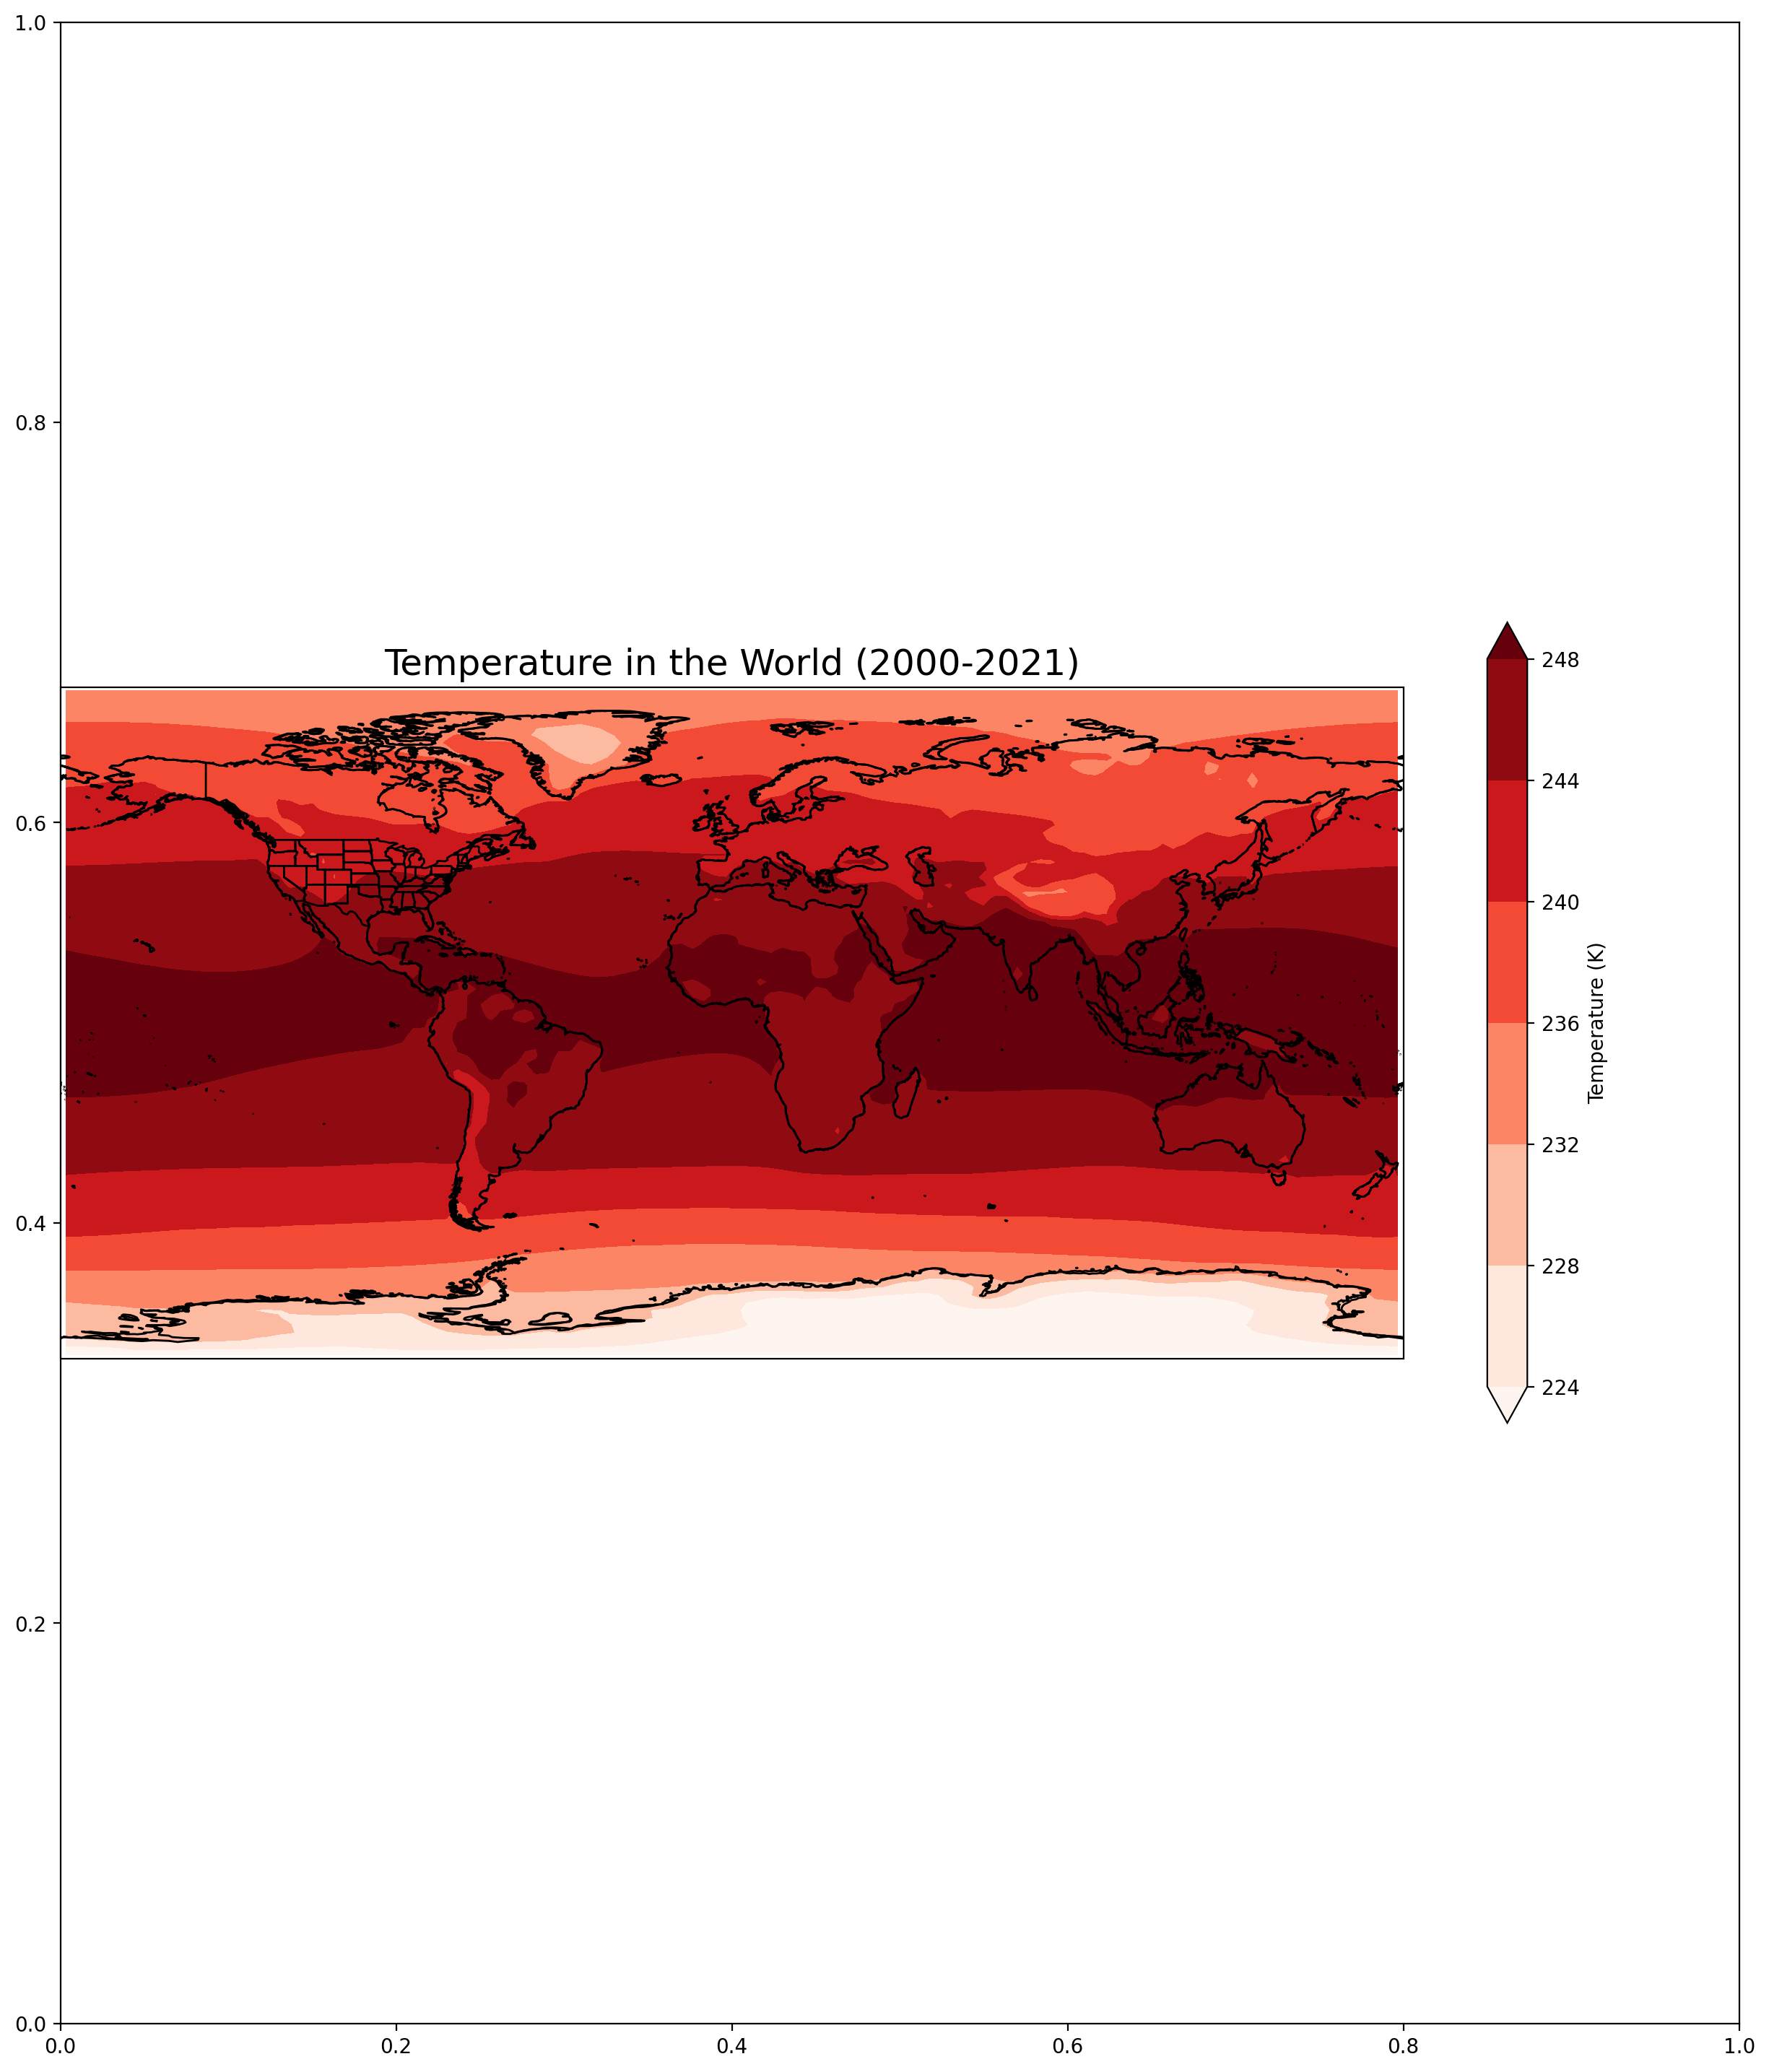

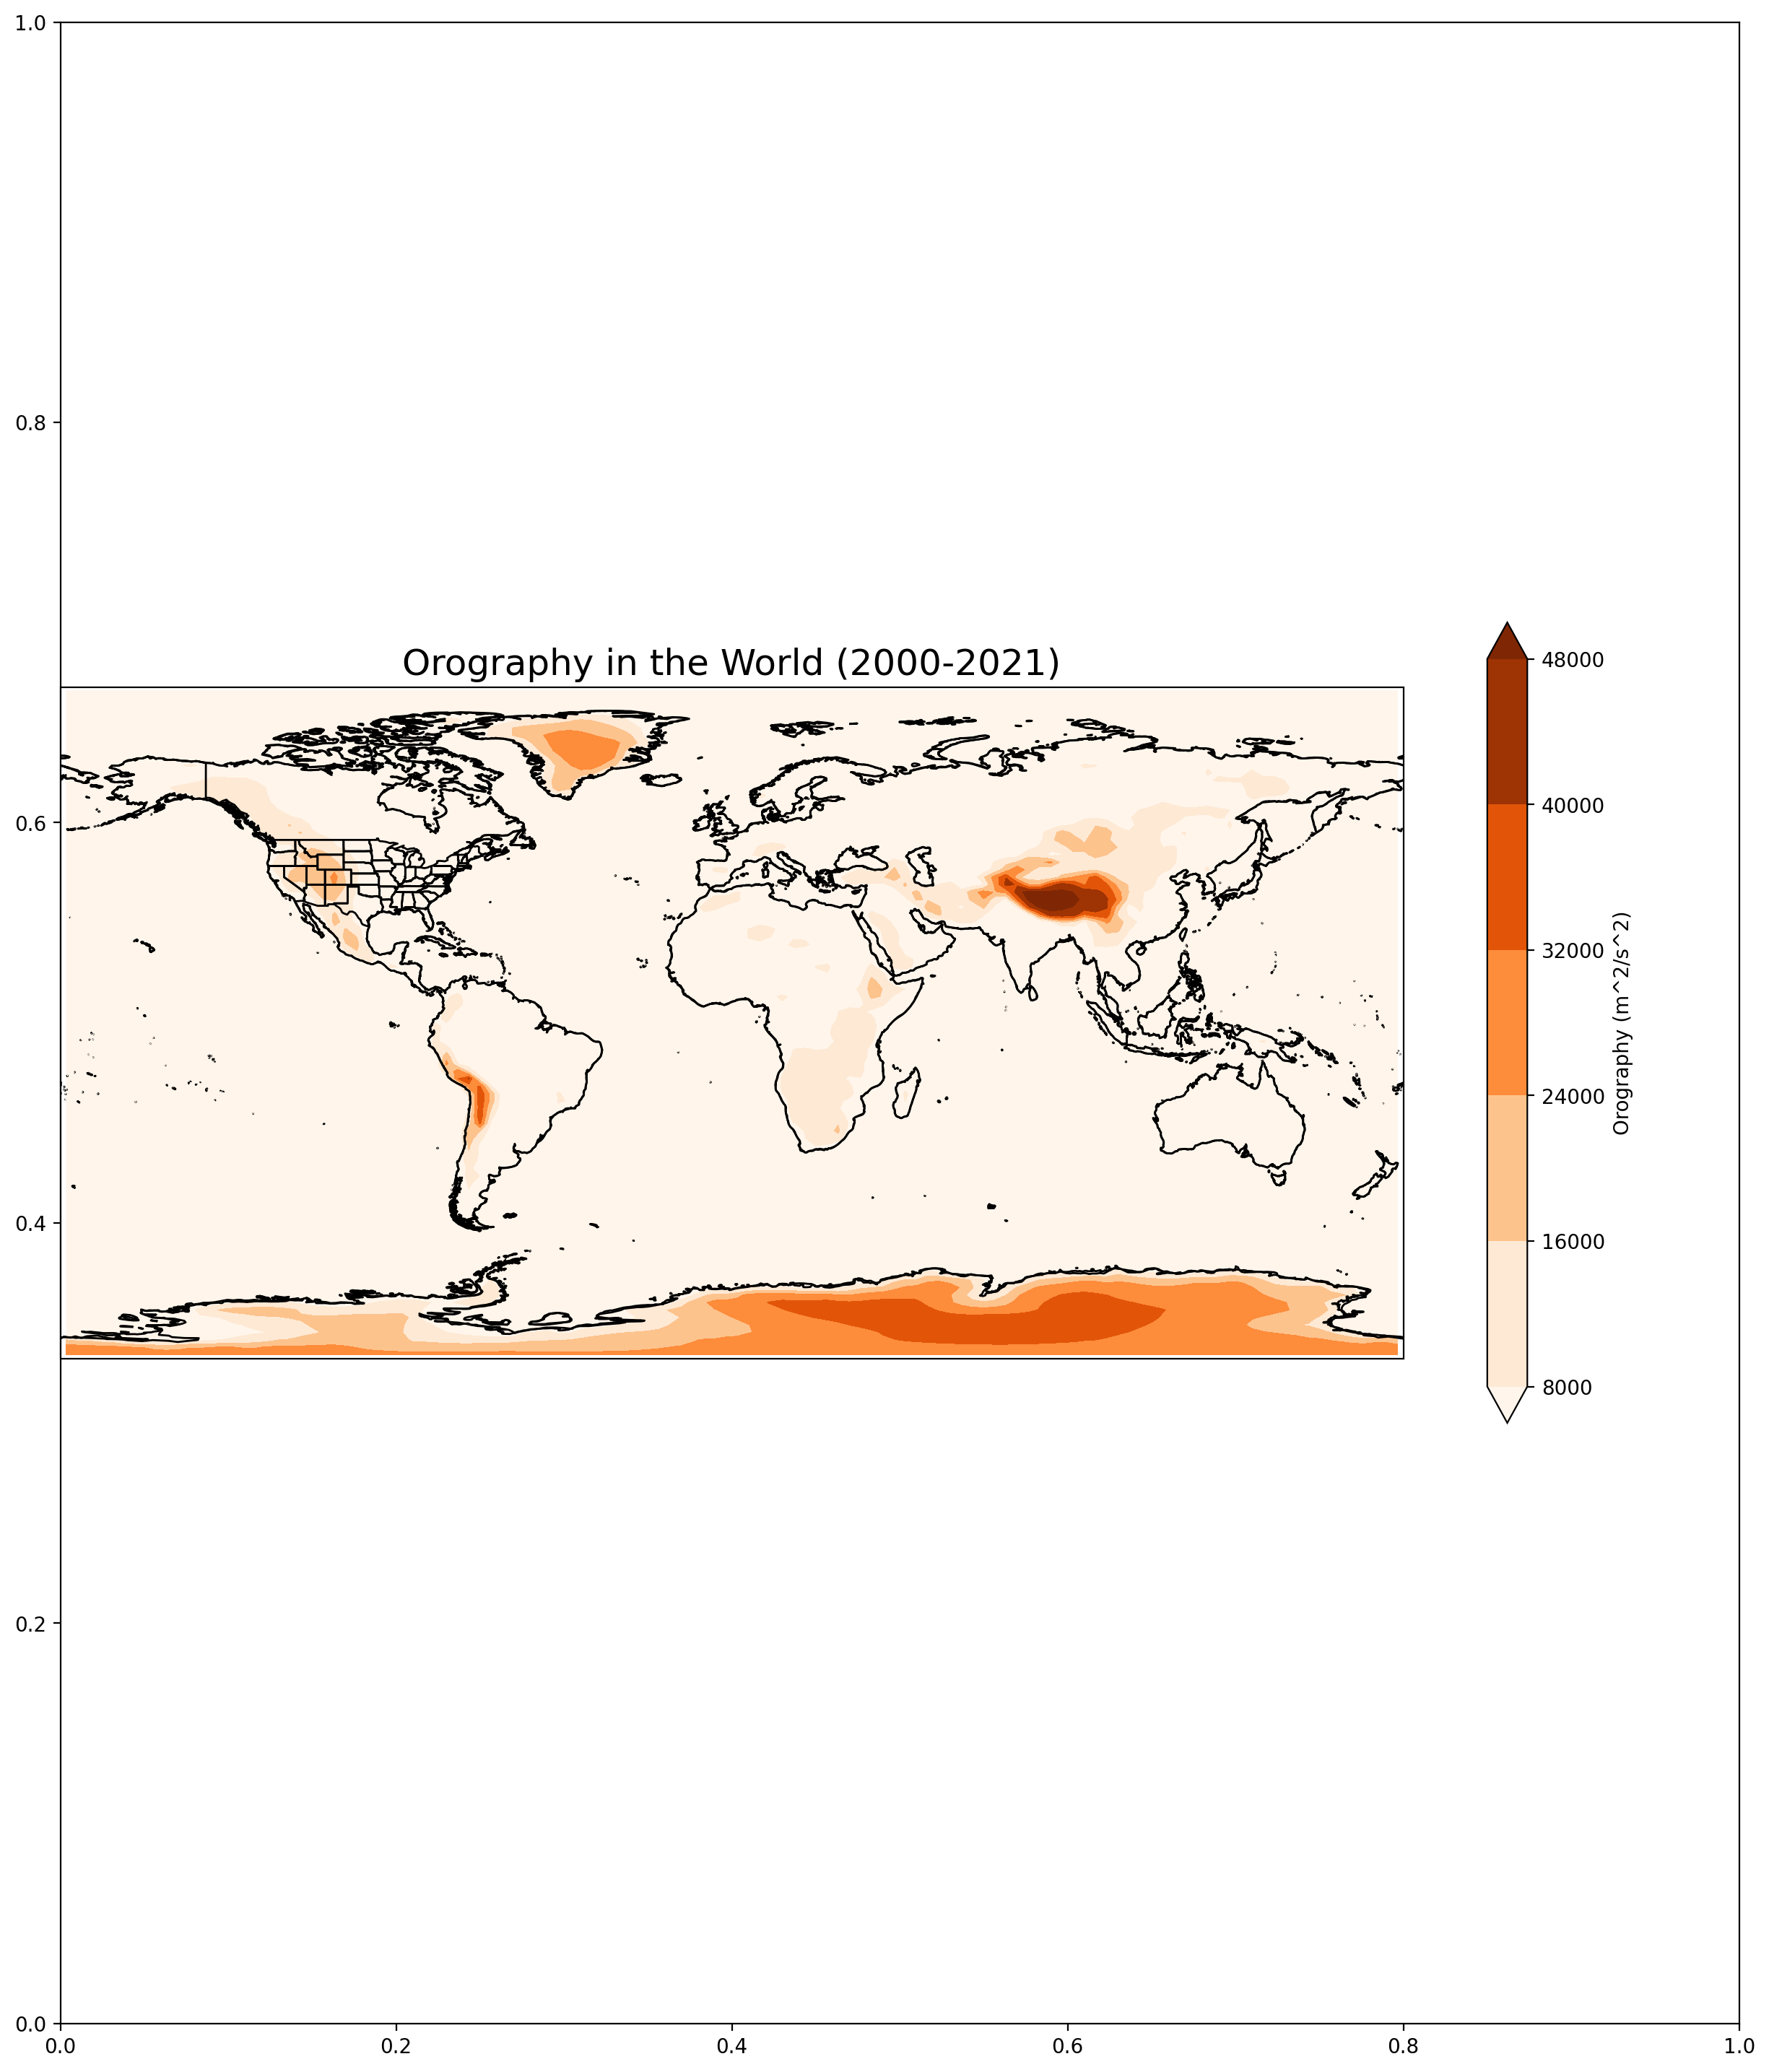

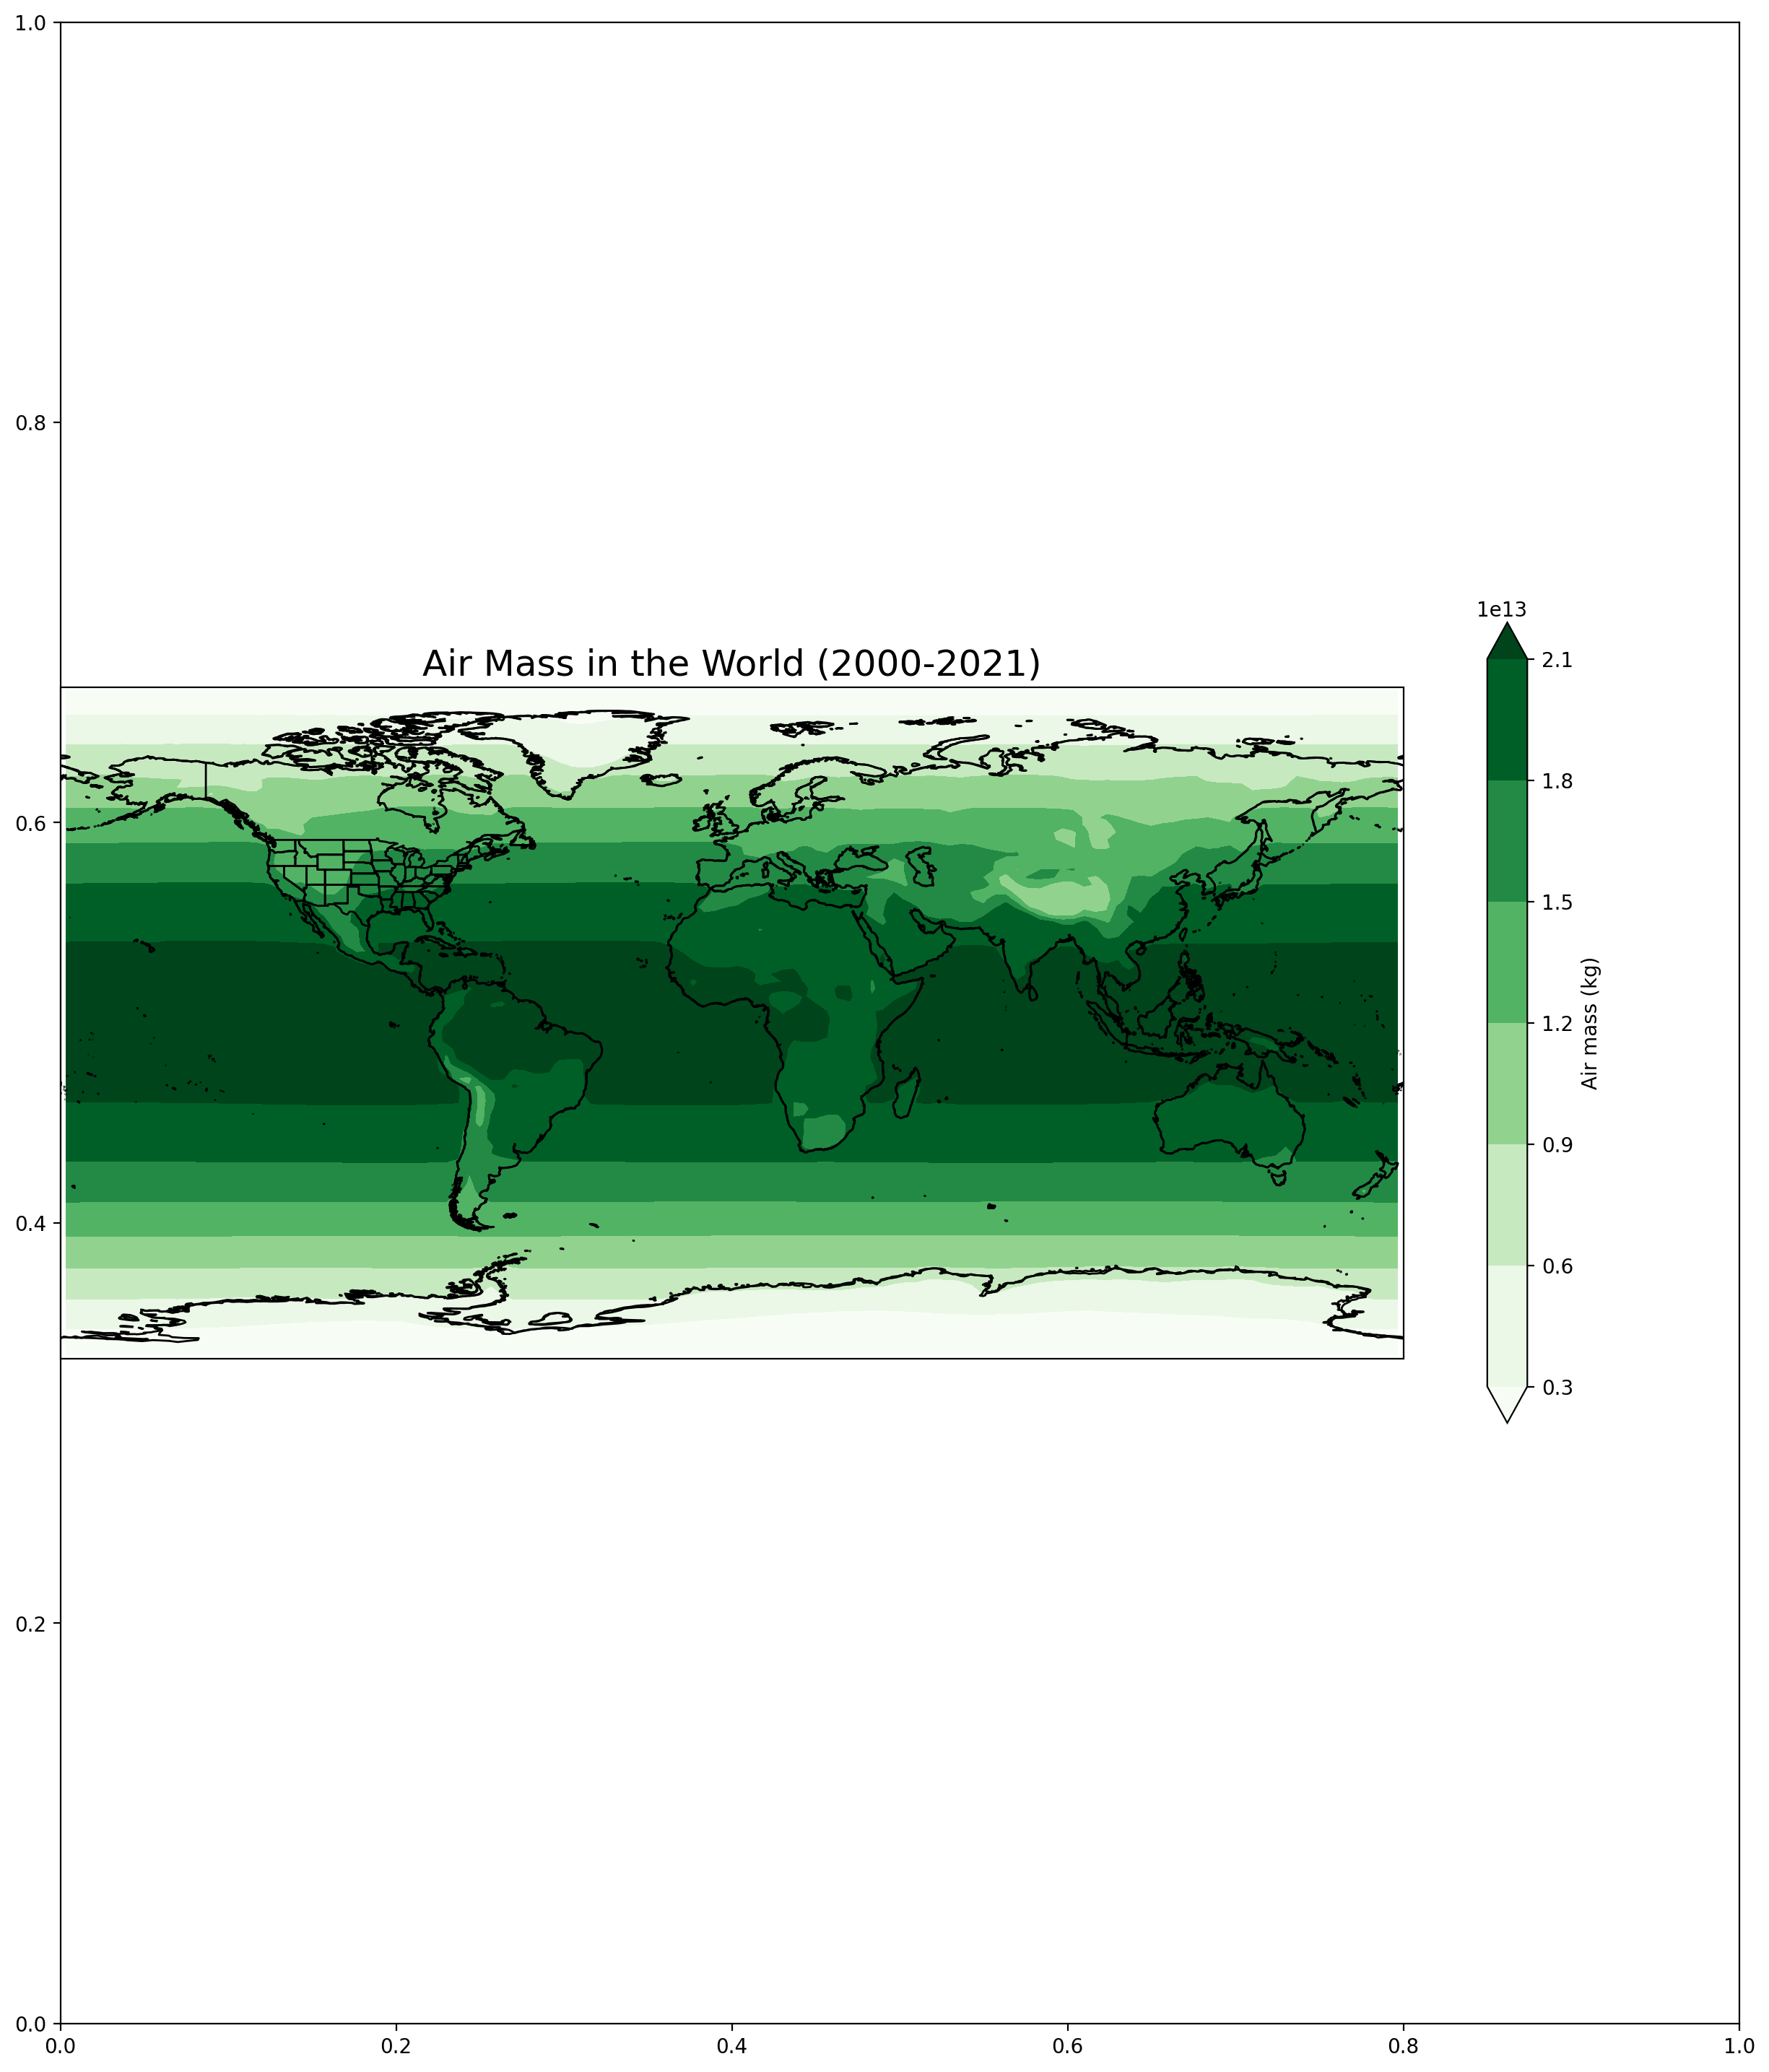

In [34]:


# Define the global extent for the maps
extent = [-180, 180, -90, 90]

# Ensure the 'figures' directory exists
import os
os.makedirs('./figures', exist_ok=True)

# Plot 1: Global Temperature (2000-2021)
fig, ax = plt.subplots(figsize=(15, 18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)  # Set the extent of the map to cover the entire globe
ax.coastlines()  # Add coastlines to the map
ax.coastlines(resolution='50m')  # Add higher resolution coastlines
ax.add_feature(cfeature.STATES)  # Add state boundaries

# Calculate the mean temperature across levels and time
Tem = ds.temperature.mean(dim=['level', 'time'])

# Create a filled contour plot of the temperature
p2 = ax.contourf(Tem.longitude, Tem.latitude, Tem, cmap='Reds', extend='both')

# Add a title and colorbar to the plot
ax.set_title('Temperature in the World (2000-2021)', fontsize=18)
fig.colorbar(p2, shrink=0.4, label='Temperature (K)')

# Save the Temperature plot
plt.savefig('./figures/global_temperature_map.png', dpi=300, bbox_inches='tight')


# Plot 2: Global Orography (2000-2021)
fig, ax = plt.subplots(figsize=(15, 18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)  # Set the extent of the map to cover the entire globe
ax.coastlines()  # Add coastlines to the map
ax.coastlines(resolution='50m')  # Add higher resolution coastlines
ax.add_feature(cfeature.STATES)  # Add state boundaries

# Calculate the mean orography (elevation) over time
OR = ds.orography.mean(dim=['time'])

# Create a filled contour plot of the orography
p4 = ax.contourf(OR.longitude, OR.latitude, OR, cmap='Oranges', extend='both')

# Add a title and colorbar to the plot
ax.set_title('Orography in the World (2000-2021)', fontsize=18)
fig.colorbar(p4, shrink=0.4, label='Orography (m^2/s^2)')

# Save the Orography plot
plt.savefig('./figures/global_orography_map.png', dpi=300, bbox_inches='tight')


# Plot 3: Global Air Mass (2000-2021)
fig, ax = plt.subplots(figsize=(15, 18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)  # Set the extent of the map to cover the entire globe
ax.coastlines()  # Add coastlines to the map
ax.coastlines(resolution='50m')  # Add higher resolution coastlines
ax.add_feature(cfeature.STATES)  # Add state boundaries

# Calculate the mean air mass across levels and time
AM = ds.air_mass.mean(dim=['level', 'time'])

# Create a filled contour plot of the air mass
p3 = ax.contourf(AM.longitude, AM.latitude, AM, cmap='Greens', extend='both')

# Add a title and colorbar to the plot
ax.set_title('Air Mass in the World (2000-2021)', fontsize=18)
fig.colorbar(p3, shrink=0.4, label='Air mass (kg)')

# Save the Air Mass plot
plt.savefig('./figures/global_air_mass_map.png', dpi=300, bbox_inches='tight')


## For Bangaldesh
### Temperature in Bangladesh (2000-2021)
The first plot shows the average temperature across Bangladesh from 2000 to 2021. The temperature ranges from approximately 224 K to 248 K. Higher temperatures are observed consistently throughout the country, with the northern regions, such as Rajshahi and Rangpur divisions, showing slightly higher temperatures than the southern coastal areas. The uniformity in color indicates relatively consistent warm temperatures across the country, reflecting Bangladesh's tropical climate.

### Orography in Bangladesh (2000-2021)
The second plot illustrates the orography (elevation) across Bangladesh. Elevation values range from about 8,000 m²/s² to 48,000 m²/s². The highest elevations are found in the northeastern region near Sylhet and the southeastern region near the Chittagong Hill Tracts. These hilly areas stand out against the predominantly low-lying terrain, especially the vast flat areas in the central and southern parts of the country, including the Dhaka and Barisal divisions.

### Air Mass in Bangladesh (2000-2021)
The third plot shows the distribution of air mass over Bangladesh, with values ranging from approximately \(0.3 \times 10^{13}\) kg to \(2.1 \times 10^{13}\) kg. The air mass appears relatively evenly distributed across the country, with a slight increase in the northern and central regions, such as the Mymensingh and Dhaka divisions. The southern coastal regions, including Khulna and Chittagong, show slightly lower air mass values, corresponding to the coastal and low-lying areas.

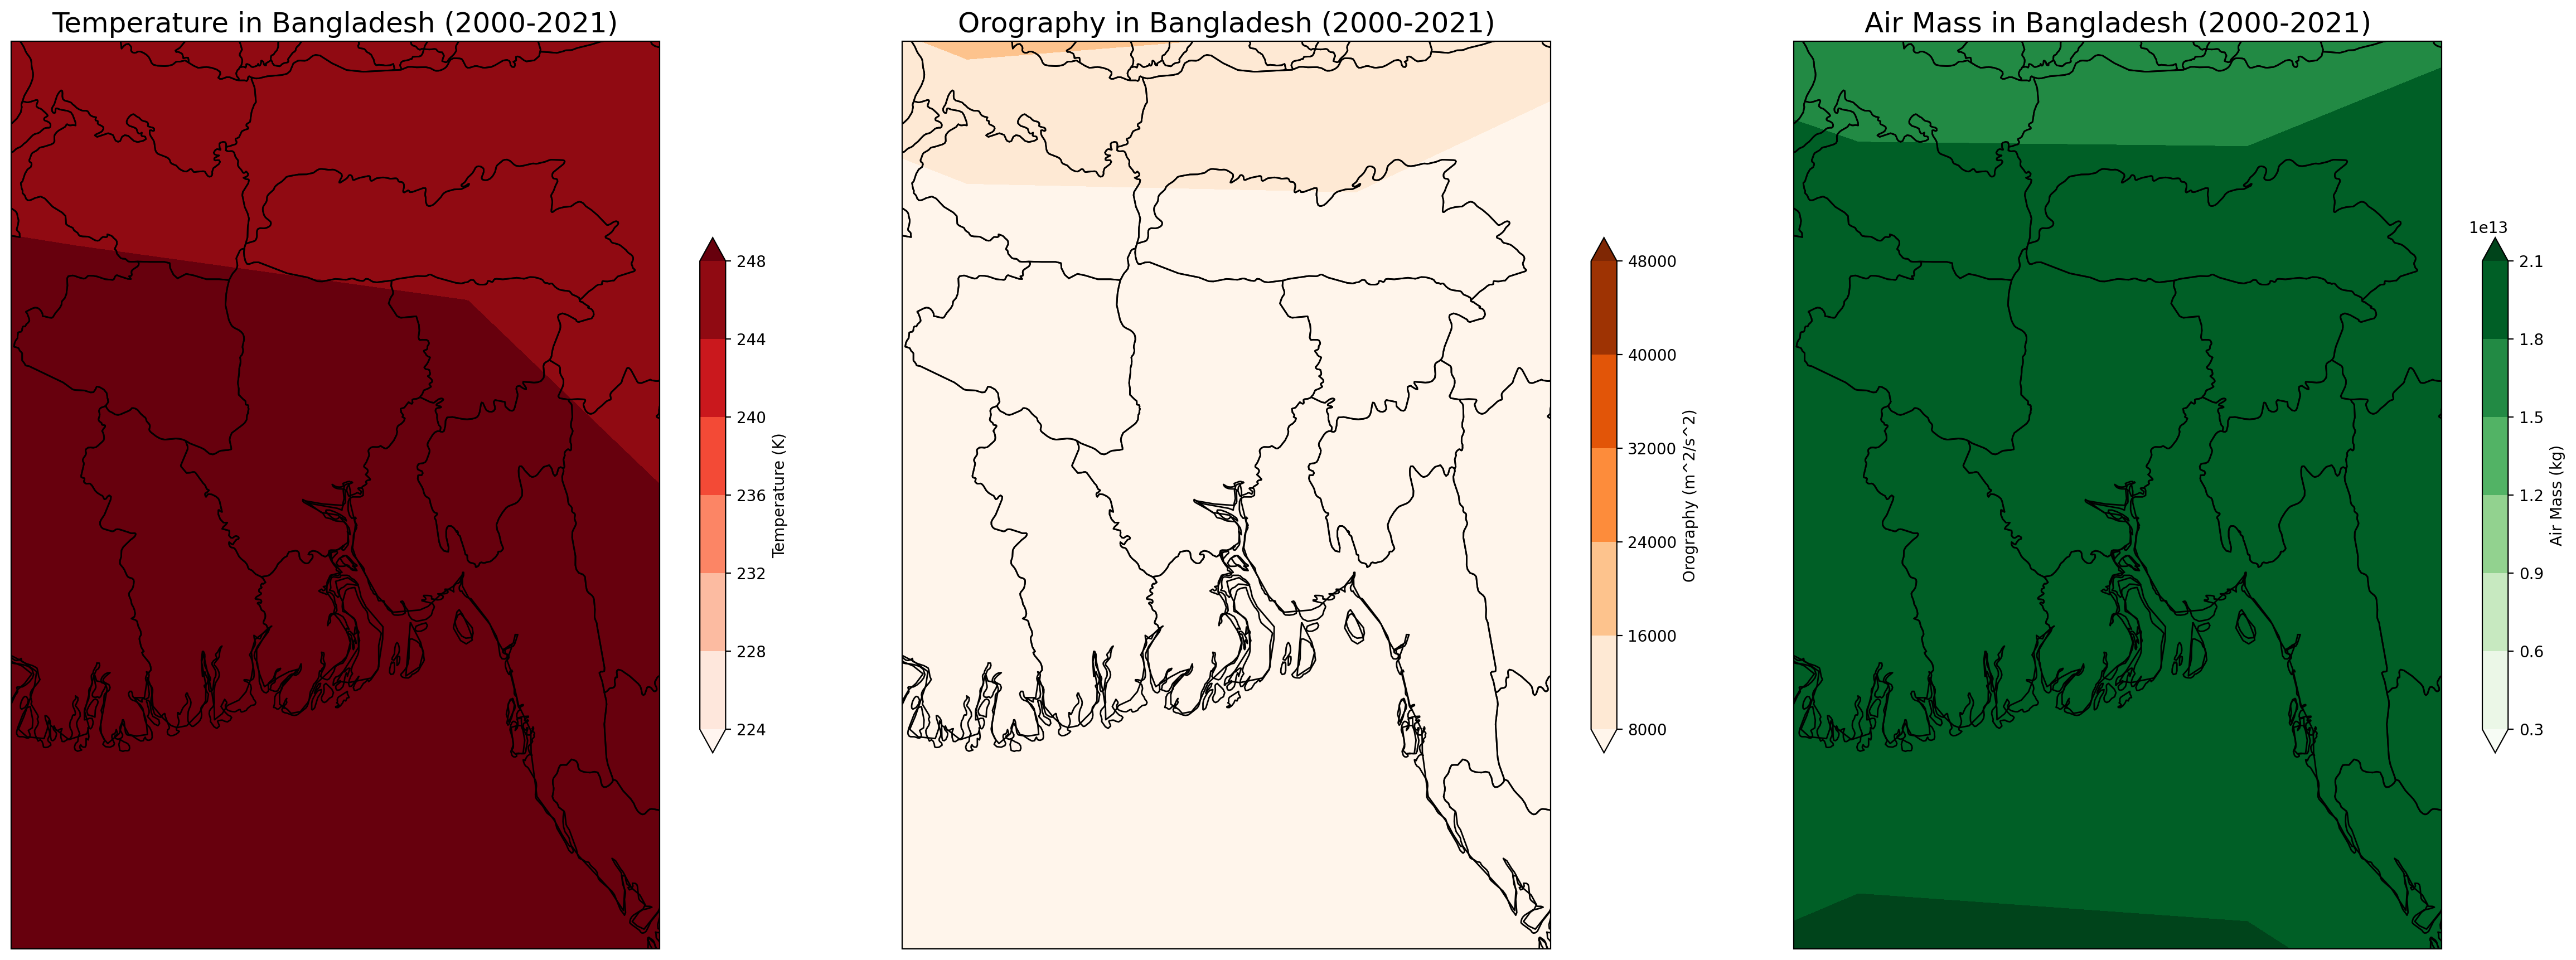

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the extent for Bangladesh
extent = [88, 93, 20, 27]  # Approximate geographical boundaries of Bangladesh

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Adjust the layout for better spacing
plt.subplots_adjust(hspace=0.3, wspace=0.1)

# 1st Plot: Temperature in Bangladesh
ax1 = axes[0]
ax1.set_extent(extent)
ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.STATES)

# Calculate and plot mean temperature
Tem = ds.temperature.mean(dim=['level', 'time'])
p1 = ax1.contourf(Tem.longitude, Tem.latitude, Tem, cmap='Reds', extend='both')
ax1.set_title('Temperature in Bangladesh (2000-2021)', fontsize=18)
fig.colorbar(p1, ax=ax1, shrink=0.5, label='Temperature (K)')

# 2nd Plot: Orography in Bangladesh
ax2 = axes[1]
ax2.set_extent(extent)
ax2.coastlines(resolution='50m')
ax2.add_feature(cfeature.STATES)

# Calculate and plot mean orography
OR = ds.orography.mean(dim=['time'])
p2 = ax2.contourf(OR.longitude, OR.latitude, OR, cmap='Oranges', extend='both')
ax2.set_title('Orography in Bangladesh (2000-2021)', fontsize=18)
fig.colorbar(p2, ax=ax2, shrink=0.5, label='Orography (m^2/s^2)')

# 3rd Plot: Air Mass in Bangladesh
ax3 = axes[2]
ax3.set_extent(extent)
ax3.coastlines(resolution='50m')
ax3.add_feature(cfeature.STATES)

# Calculate and plot mean air mass
AM = ds.air_mass.mean(dim=['level', 'time'])
p3 = ax3.contourf(AM.longitude, AM.latitude, AM, cmap='Greens', extend='both')
ax3.set_title('Air Mass in Bangladesh (2000-2021)', fontsize=18)
fig.colorbar(p3, ax=ax3, shrink=0.5, label='Air Mass (kg)')

# Save the combined plot
plt.savefig('./figures/bangladesh_combined_maps.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()


## Comparison among BAngladesh, USA and China
### Air Mass Comparison (2000-2021)
The first set of plots compares the distribution of air mass across Bangladesh, the USA, and China from 2000 to 2021. The air mass values range similarly across the three countries, with a maximum value around \(2.1 \times 10^{13}\) kg. In Bangladesh, the air mass is quite uniformly distributed, reflecting the country's flat topography and consistent climate. In contrast, the USA shows more variation, with higher air mass in the central and western regions, possibly due to the influence of the Rocky Mountains and the plains. China displays significant variation as well, particularly with lower air masses in the high-altitude regions like the Tibetan Plateau and higher values in the densely populated eastern regions.

### Orography Comparison (2000-2021)
The second set of plots illustrates the orography, or elevation, across Bangladesh, the USA, and China. Bangladesh is predominantly low-lying, with orography values mostly under 16,000 m²/s², except for a few hilly areas in the northeast and southeast. The USA, however, has a wide range of elevations, with significant orographic features like the Rocky Mountains in the west showing values up to 40,000 m²/s². China exhibits even more dramatic elevation differences, with the Tibetan Plateau standing out prominently with orography values reaching up to 48,000 m²/s², reflecting its status as the "Roof of the World."

### Temperature Comparison (2000-2021)
The third set of plots compares the temperature distribution across the three countries. Bangladesh experiences relatively high and uniform temperatures, ranging from 224 K to 248 K, consistent with its tropical climate. In the USA, there is a noticeable temperature gradient, with cooler temperatures in the northern regions and warmer temperatures in the south, particularly in the central plains. China also shows a significant temperature range, with the coldest temperatures found in the northern regions near Mongolia and the warmest in the southern regions, which aligns with its varied climate zones from subtropical in the south to temperate and even subarctic in the north.

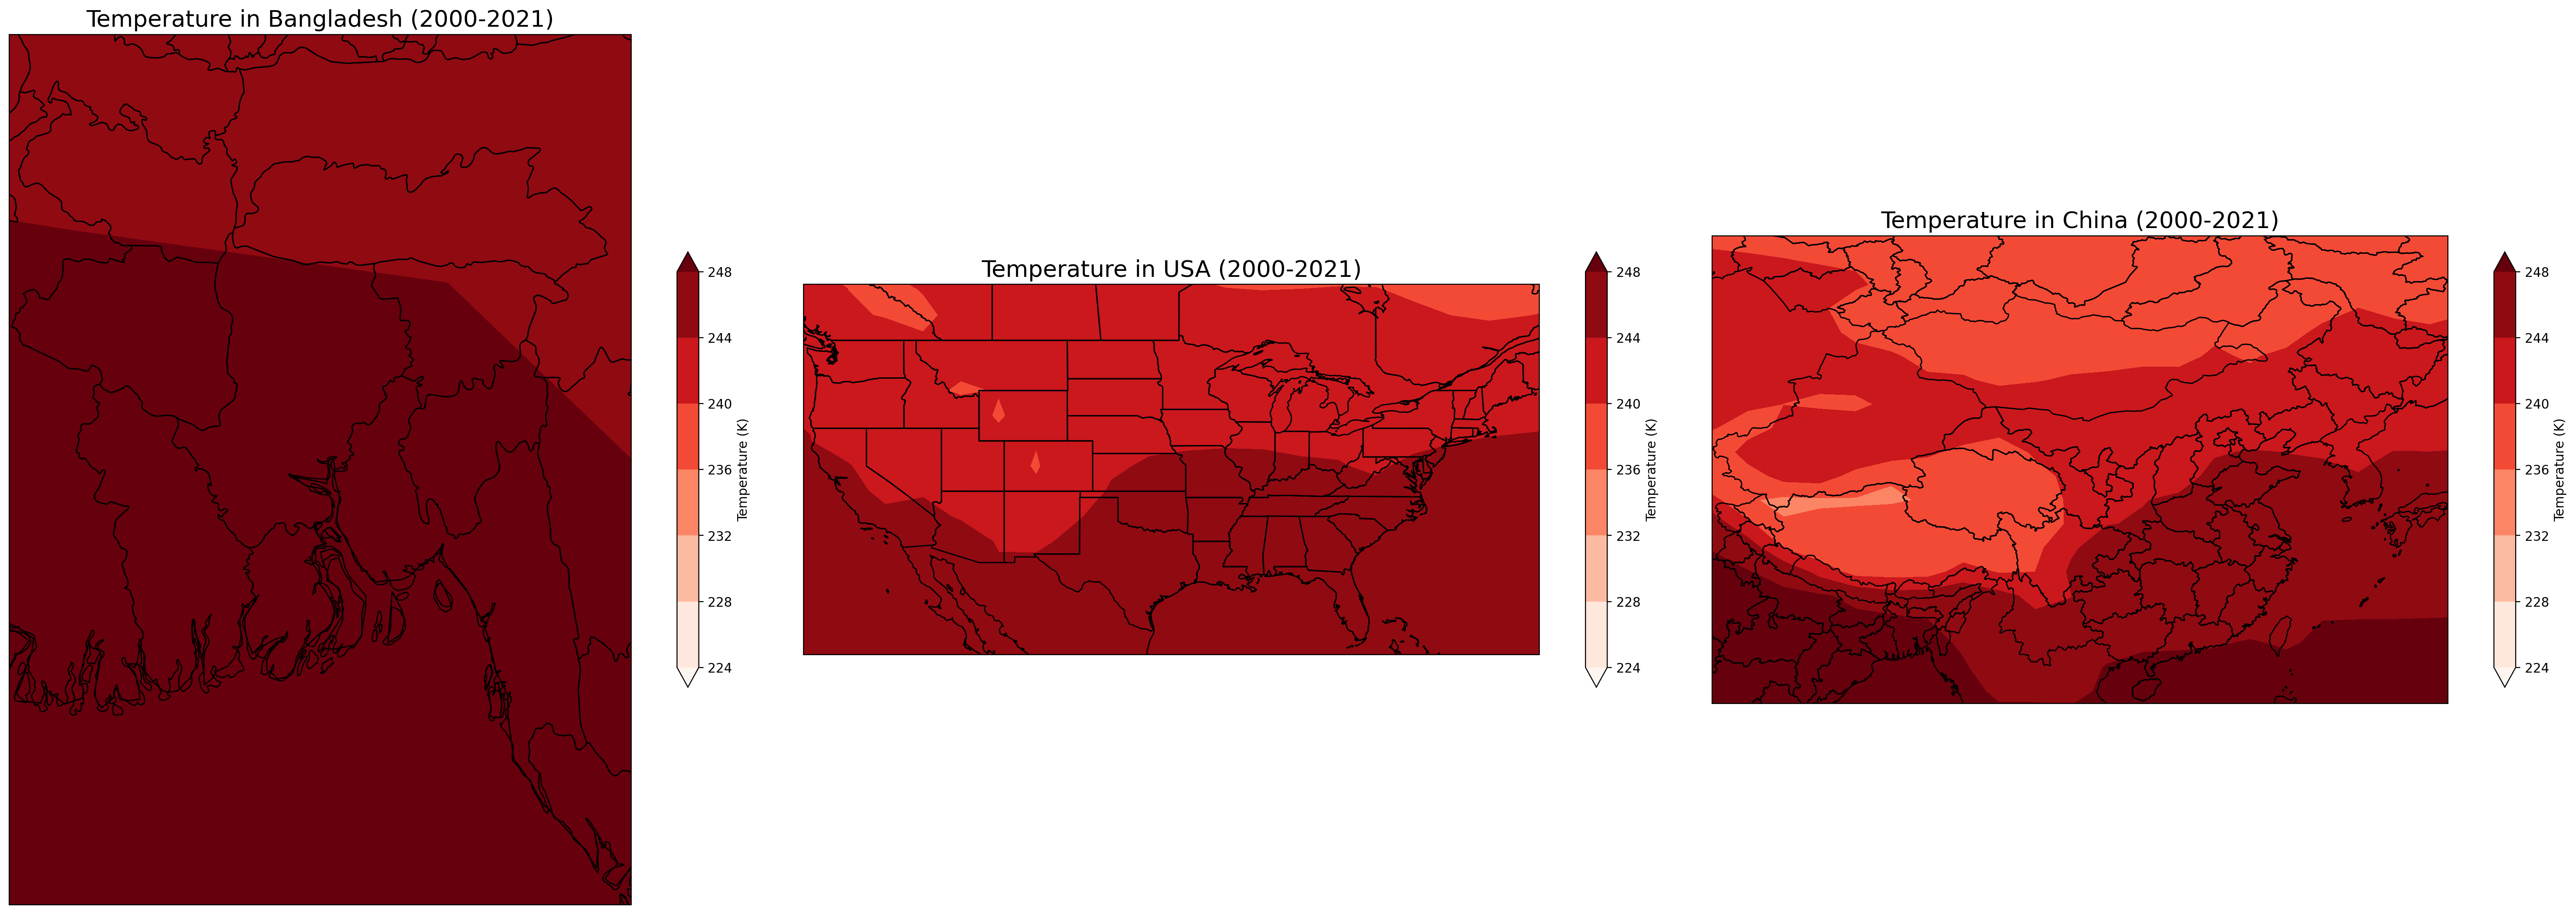

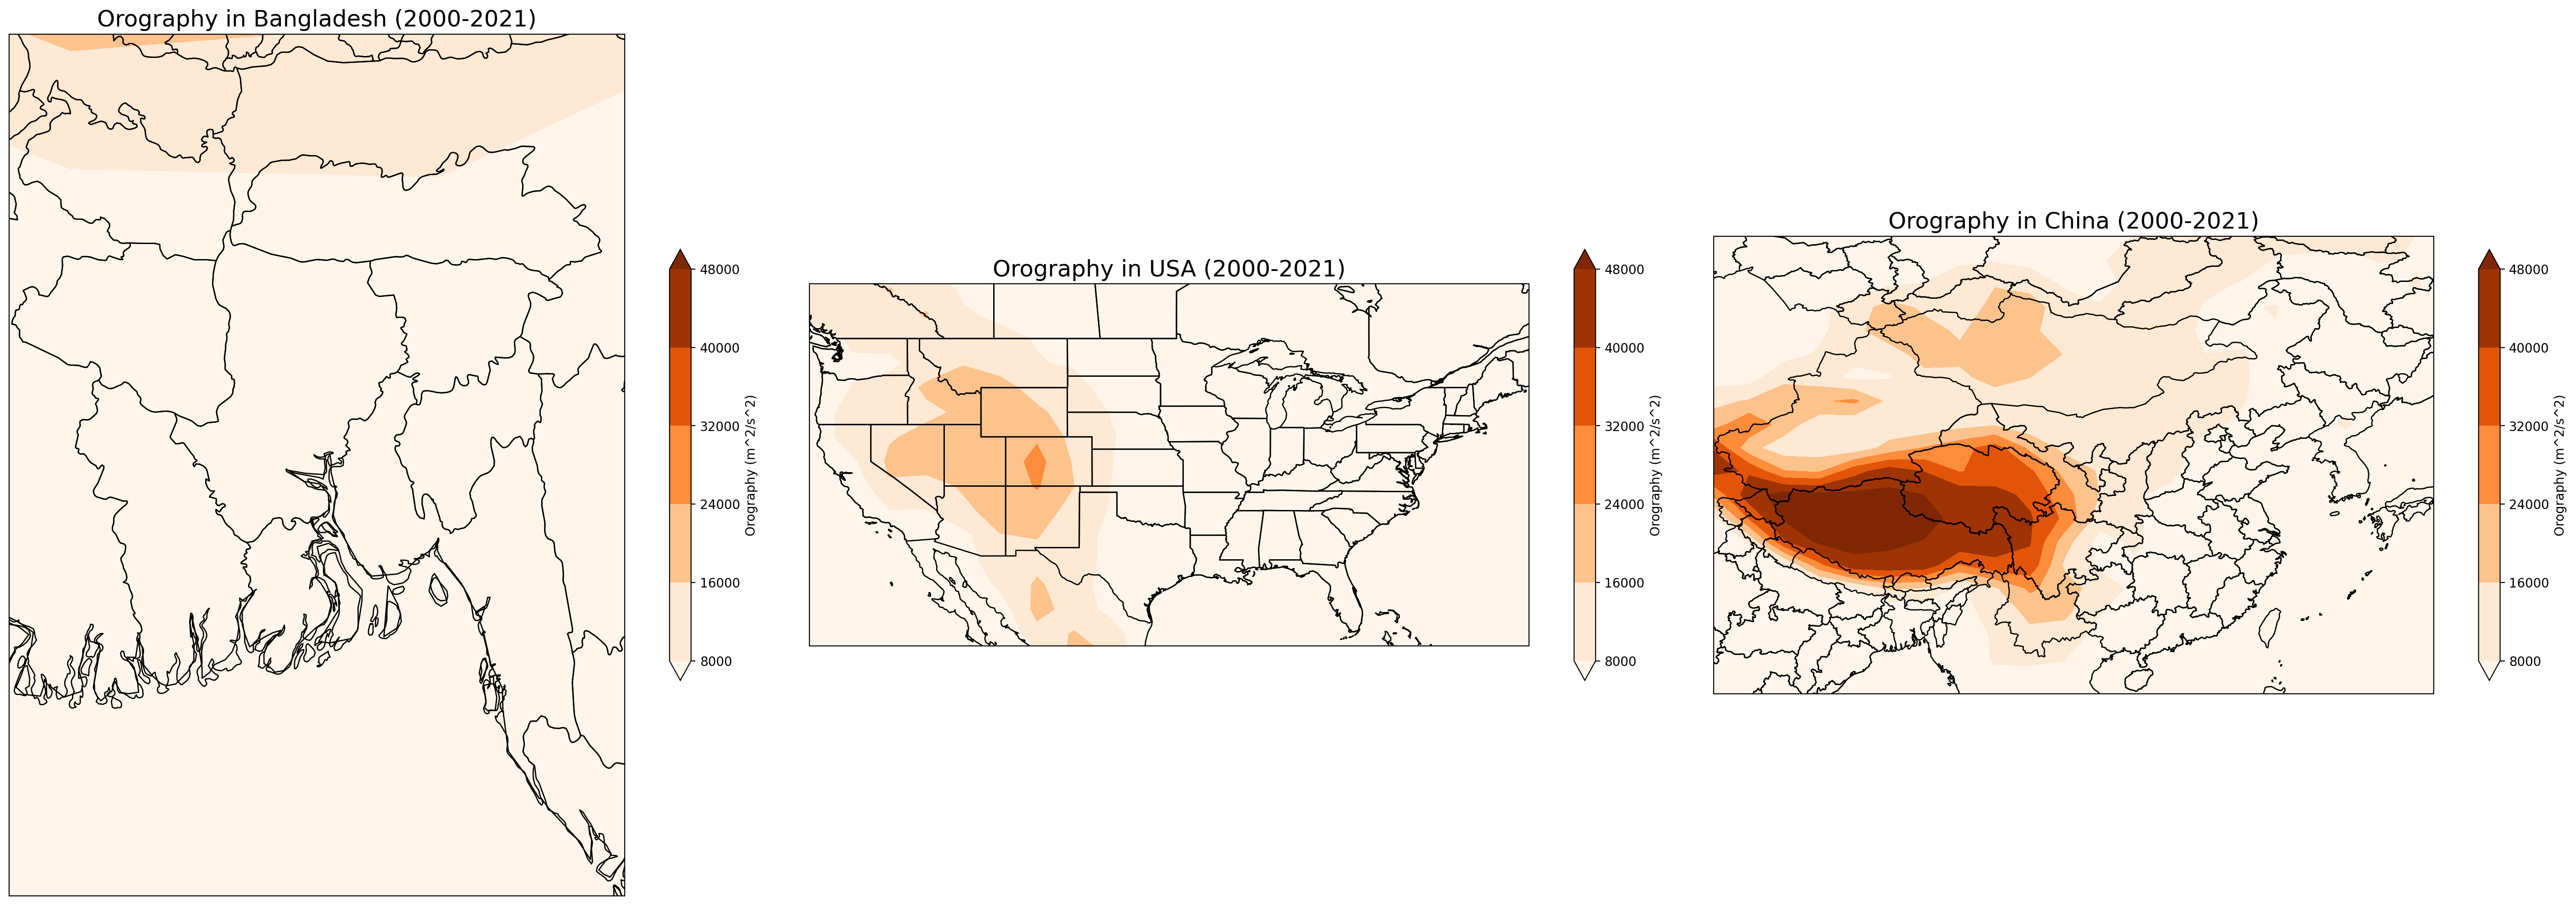

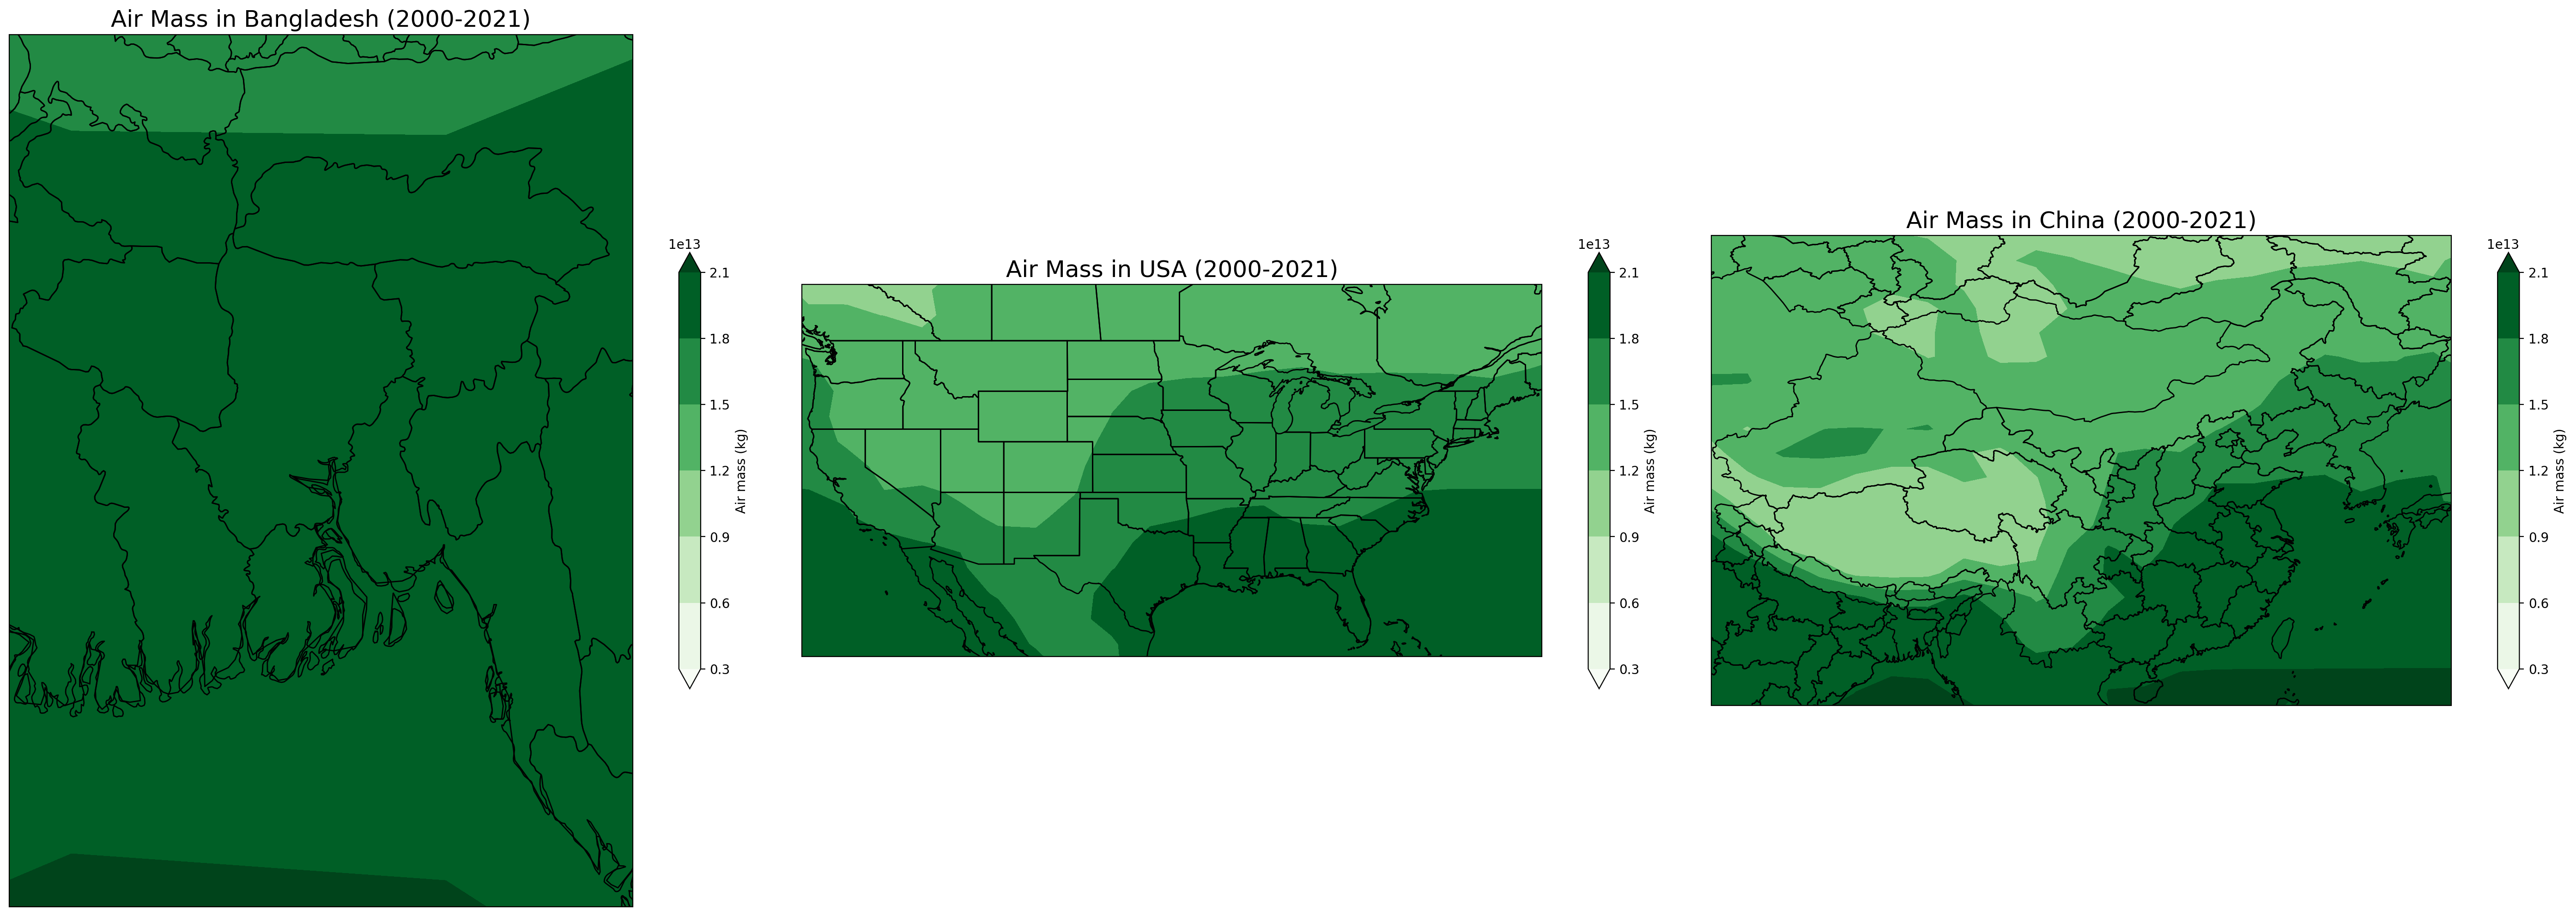

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define extents for Bangladesh, USA, and China
extents = {
    'Bangladesh': [88, 93, 20, 27],  # Geographical boundaries for Bangladesh
    'USA': [-125, -66.5, 24, 50],    # Geographical boundaries for the USA
    'China': [73.5, 135.0, 18.0, 53.5]  # Geographical boundaries for China
}

# Variables to plot with their respective data, colormap, and labels
variables = {
    'Temperature': {'data': ds.temperature.mean(dim=['level', 'time']), 'cmap': 'Reds', 'label': 'Temperature (K)'},
    'Orography': {'data': ds.orography.mean(dim=['time']), 'cmap': 'Oranges', 'label': 'Orography (m^2/s^2)'},
    'Air Mass': {'data': ds.air_mass.mean(dim=['level', 'time']), 'cmap': 'Greens', 'label': 'Air mass (kg)'}
}

# Loop over each variable and create a horizontal row of plots for the three countries
for var_name, var_info in variables.items():
    # Create a figure with 1x3 subplots for Bangladesh, USA, and China
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Iterate over the regions and their respective extents
    for i, (region, extent) in enumerate(extents.items()):
        ax = axes[i]  # Get the axis for the current region
        ax.set_extent(extent)  # Set the map extent to the region's boundaries
        ax.coastlines(resolution='50m')  # Add coastlines with medium resolution
        ax.add_feature(cfeature.STATES)  # Add state boundaries for additional context
        
        data = var_info['data']  # Get the data for the current variable
        cmap = var_info['cmap']  # Get the colormap for the current variable
        label = var_info['label']  # Get the label for the colorbar
        
        # Plot the data as a filled contour map
        p = ax.contourf(data.longitude, data.latitude, data, cmap=cmap, extend='both')
        ax.set_title(f'{var_name} in {region} (2000-2021)', fontsize=18)  # Set the title for each subplot
        fig.colorbar(p, ax=ax, shrink=0.5, label=label)  # Add a colorbar to each subplot
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Save the figure for the current variable
    plt.savefig(f'./figures/{var_name.lower()}_bangladesh_usa_china.png', dpi=300, bbox_inches='tight')
    
    # Show the plot (optional)
    plt.show()
